**OPTI 556 HW1**

**Student: Chini Tang**

**SID: 23576491**

In [158]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure, transform
from skimage import io
from google.colab import files
import scipy.integrate as integrate
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
import pywt
from scipy.linalg import toeplitz

# plt.rcParams['figure.figsize'] = [20, 10]
# plt.rcParams.update({'font.size': 16})

# Problem 1: fourier series estimation of signals

## Basic Fourier representation formula:

create a function that input coefficients number list and function, draw out the plot of oringal signal and its fourier representation

In [159]:
def fourier_representation(coeffss,vf):
  idx=1
  plt.figure(figsize=(5,20))
  for coeffs in coeffss:
    xrange = np.linspace(-.5,.5,100)
    sv=np.zeros(coeffs)
    cv=np.zeros(coeffs)
    for pop in np.arange(coeffs):
      sv[pop]=2*integrate.quad(lambda x: vf(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
      cv[pop]=2*integrate.quad(lambda x: vf(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
      cv[0]=cv[0]
      def px(x,sv,cv):
        pxx=0;
        for pop in np.arange(len(sv)):
          pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
        return pxx

    
    plt.subplot(len(coeffss),1,idx)
    plt.subplots_adjust(wspace=10,hspace=10)
    
    plt.plot(xrange,vf(xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
    plt.ylim(-.5, 1.5) 
    plt.title("Estimation with  %i Fourier terms" %(pop+1))
    plt.tight_layout()
    idx+=1

## first function: 
\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        0 & x < -0.25 \\
        4(x+0.25) & -0.25\le x < 0\\
        1 & 0\le x < 0.25\\
        0 & x\ge 0.25\\
        \end{array}
        \right.
    \end{align}

Text(0.5, 1.0, 'First Function')

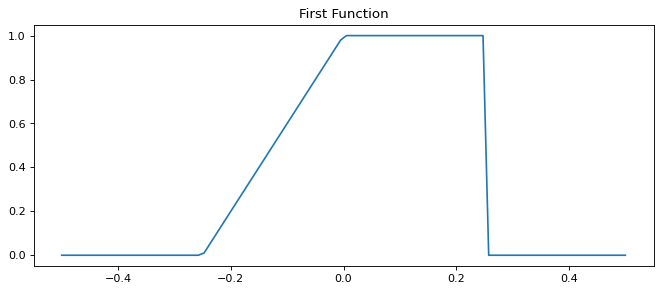

In [160]:
def func_1(x):
  if x < -0.25:
    y = 0.0
  elif x < 0:
    y=4.0 * (x + 0.25)
  elif x < 0.25:
    y = 1.0
  else:
    y=0.0
  return y

f = np.vectorize(func_1)
x = np.linspace(-0.5, 0.5, 100)

plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x,f(x))
plt.title("First Function")

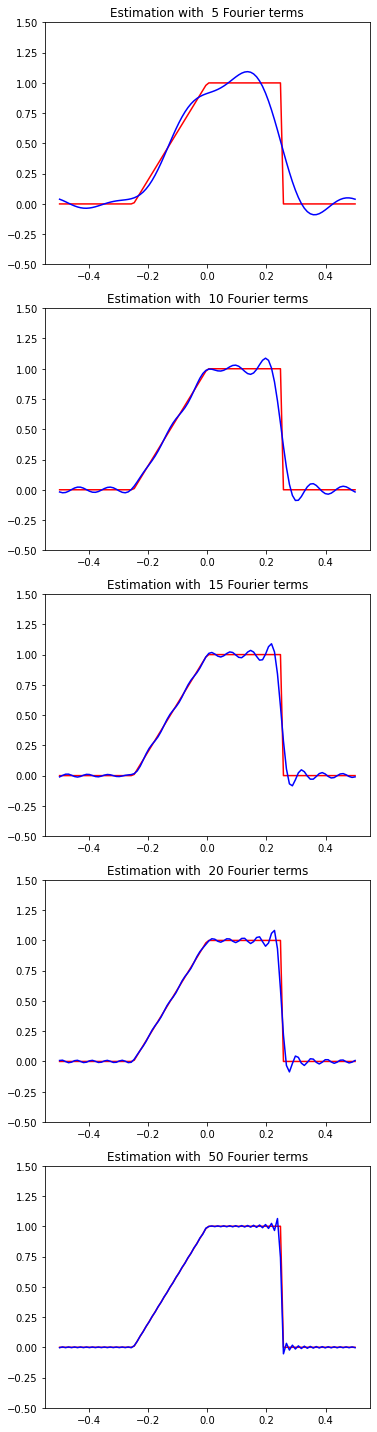

In [161]:
vf = np.vectorize(func_1)
fourier_representation([5,10,15,20,50],vf)

Gibbs effect occurs at discontinuous point (x = 0.25)

## second function:

\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        1.5(x+1) & x < -0.25 \\
        4(x^2+0.25) & -0.25\le x < 0\\
        0.5 & 0\le x < 0.25\\
        1 & x\ge 0.25\\
        \end{array}
        \right.
    \end{align}



Text(0.5, 1.0, 'Second Function')

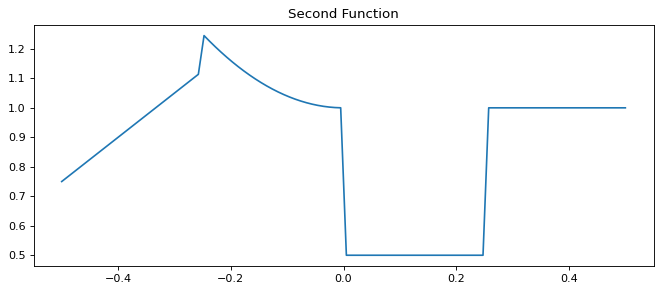

In [162]:
def func_2(x):
  if x < -0.25:
    y = 1.5*(x+1)
  elif x < 0:
    y = 4*(x**2+0.25)
  elif x < 0.25:
    y = 0.5
  else:
    y = 1.0
  return y

f = np.vectorize(func_2)
x = np.linspace(-0.5, 0.5, 100)

plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x,f(x))
plt.title("Second Function")

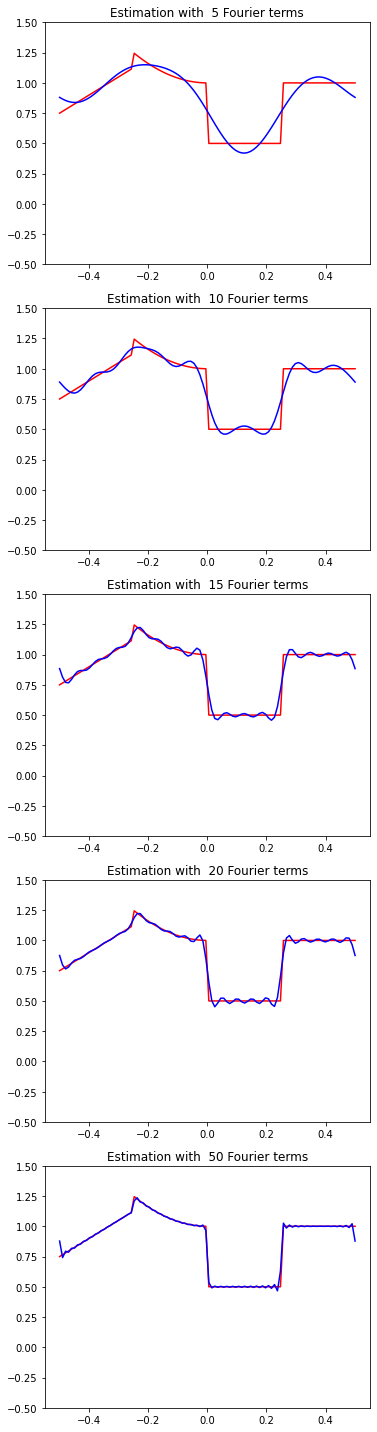

In [163]:
vf2 = np.vectorize(func_2)
fourier_representation([5,10,15,20,50],vf2)

Gibbs effect occurs at discontinuous points (x = -0.5, -0.25, 0, 0.5)

## third function:
\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        5x^2 & x < -0.25 \\
        1.25x & -0.25\le x < 0.25\\
        0.2 & x\ge 0.25\\
        \end{array}
        \right.
    \end{align}

Text(0.5, 1.0, 'Third Function')

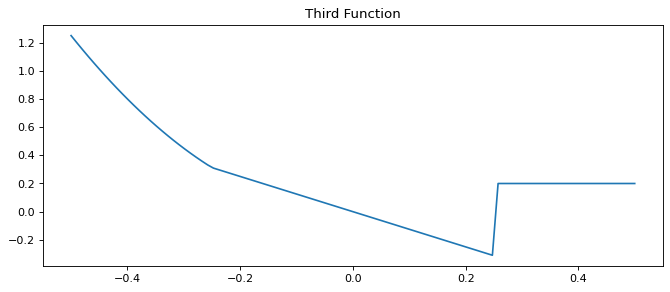

In [164]:
def func_3(x):
  if x < -0.25:
    y = 5*(x**2)
  elif x < 0.25:
    y = -1.25*x
  else:
    y = 0.2
  return y


f = np.vectorize(func_3)
x = np.linspace(-0.5, 0.5, 100)

plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x,f(x))
plt.title("Third Function")

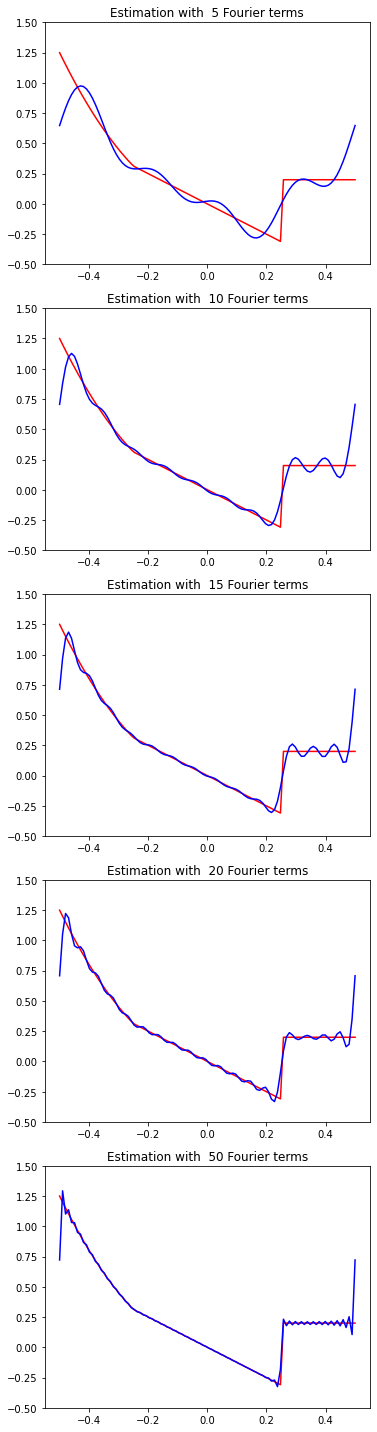

In [165]:
vf3 = np.vectorize(func_3)
fourier_representation([5,10,15,20,50],vf3)

Gibbs effect occurs at discontinuous points (x = -0.5, 0.25, 0.5)

## fourth function:
\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        0.5x & x < -0.25 \\
        -x^2-0.0625 & -0.25\le x < 0.25\\
        x-0.375 & x\ge 0.25\\
        \end{array}
        \right.
    \end{align}

Text(0.5, 1.0, 'Fourth Function')

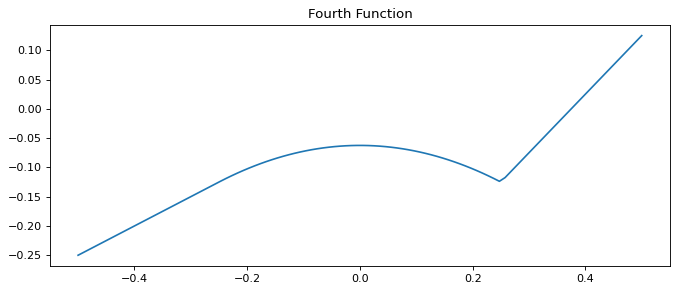

In [166]:
def func_4(x):
  if x < -0.25:
    y = 0.5*x
  elif x < 0.25:
    y = -(x**2)-0.0625
  else:
    y = x-0.375
  return y

f = np.vectorize(func_4)
x = np.linspace(-0.5, 0.5, 100)

plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x,f(x))
plt.title("Fourth Function")

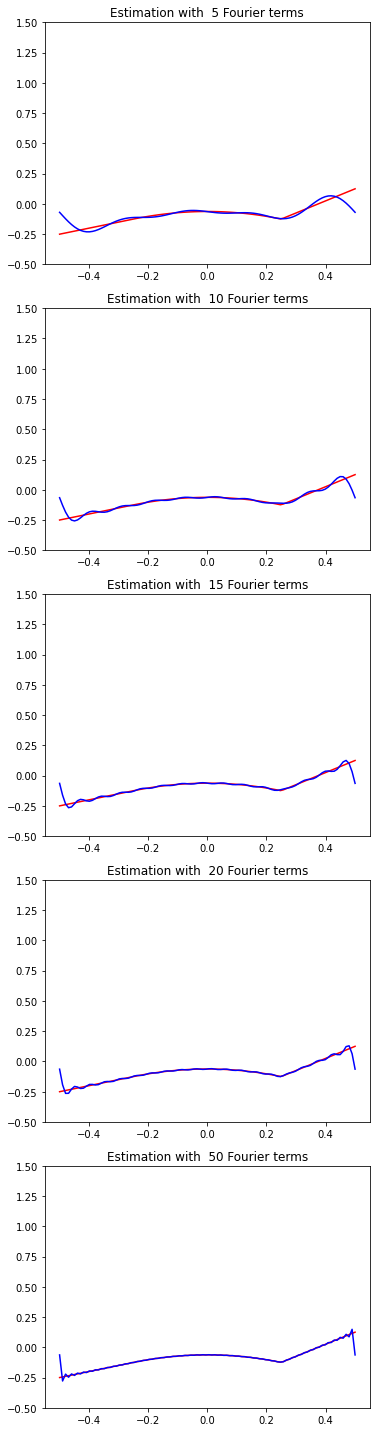

In [167]:
vf4 = np.vectorize(func_4)
fourier_representation([5,10,15,20,50],vf4)

Gibbs effect occurs at discontinuous points (x = -0.5, 0.5)

# Problem 2: DFT, Shannon interpolation, linear and cubic spline interpolators.
The main idea of this problem:
1. create a continuous function (real-world signal)
2. sampling the function to create a discrete signal (observation)
3. taking DFT of the observation with various sampling periods, and see how they perform.
4. compare shannon, linear and cubic interpolation and see how those reconstructed signal look like.

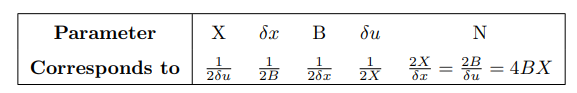

Real-world continous function (enter function) and methods.

function 1: Nyquist freq = 2, Nyquist interval = 1/2.
x is ranging from -10 to 10, then total sampling points should be at least 40 in order to maintain the signal

## First function: Nyquist frequency = 2
\begin{align}
        \text{f(x)= } & \left. e^{-0.01πx^2}cos(2πx)  \right. \\[1em]
    \end{align}

In [168]:
def func1_0(x):
  return np.exp(-0.01*np.pi*x**2)*np.cos(2*np.pi*x)

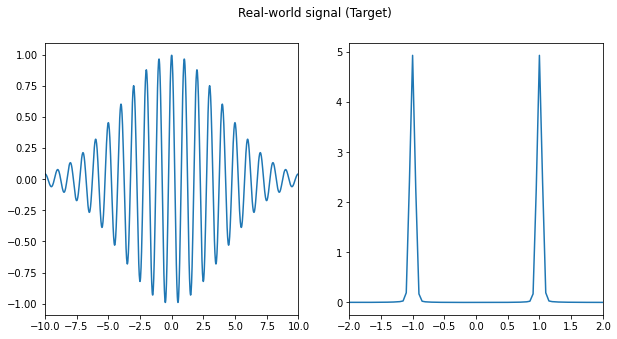

In [169]:
class DoDFT():
  def __init__(self, function, sample_points, x_range=[-10,10]):
    self.x_range = x_range
    self.function = function
    self.sample_points = sample_points

    self.x = np.linspace(self.x_range[0],self.x_range[1],self.sample_points)
    self.delta_x = abs(self.x_range[1] - self.x_range[0]) / self.sample_points
    self.u = np.arange(-1/(2*self.delta_x),1/(2*self.delta_x),1/(2*self.x[-1]))
    self.signal = function(self.x)
    self.signal_DFT = np.abs(np.fft.fftshift(np.fft.fft(np.fft.fftshift(function(self.x))))) / abs(self.u[-1] - self.u[0])
  
  def interp(self, interp_method, sample_points, x_range=[-10,10]):
    x_target = np.linspace(x_range[0],x_range[1],sample_points)
    delta_x = abs(x_range[1] - x_range[0]) / sample_points
    u_target = np.arange(-1/(2*delta_x),1/(2*delta_x),1/(2*x_target[-1])) 

    if interp_method == "shannon":
      shannon_first = self.function(x_target)
      y_target = 0
      for idx, val in enumerate(shannon_first):
        y_target += val * np.sinc(abs(u_target[-1] - u_target[0]) * (self.x - x_target[idx]))
      u_target = self.u
      x_target = self.x

    elif interp_method == "linear":
      f_temp = InterpolatedUnivariateSpline(self.x,self.function(self.x), k=1)
      y_target = f_temp(x_target)

    elif interp_method == "cubic":
      f_temp = InterpolatedUnivariateSpline(self.x,self.function(self.x), k=3)
      y_target = f_temp(x_target)

    DFT_y_target = np.abs(np.fft.fftshift(np.fft.fft(np.fft.fftshift(y_target)))) / abs(u_target[-1] - u_target[0])
    self.__plot_original_DFT(x_target, y_target, u_target, DFT_y_target, urtitle=str(interp_method)+" interp")
    return x_target, y_target, u_target, DFT_y_target

  def plot_signalDFT(self):
    self.__plot_data(self.u, self.signal_DFT)

  def plot_signal(self):
    self.__plot_data(self.x, self.signal)

  def plot_all(self, urtitle):
    self.__plot_original_DFT(self.x, self.signal, self.u, self.signal_DFT, urtitle)


  def __plot_data(self, x_data, y_data, title=" "):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x_data, y_data)
    plt.title(title)

  def __plot_original_DFT(self, x1_data, y1_data, x2_data, y2_data, urtitle):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10,5)
    fig.suptitle(urtitle)
    ax1.set_xlim([self.x_range[0],self.x_range[1]])
    ax2.set_xlim([-2,2])
    ax1.plot(x1_data, y1_data)
    ax2.plot(x2_data, y2_data)

real_world_signal = DoDFT(function=func1_0,sample_points=1000)   
real_world_signal.plot_all("Real-world signal (Target)")

Do sampling points = 200, sampling frequency = 10, 5X Nyquist frequency

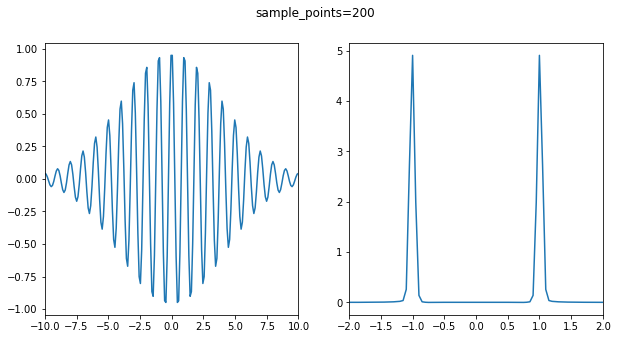

In [170]:
task_1 = DoDFT(function=func1_0,sample_points=200)   
task_1.plot_all("sample_points=200")

Sampling points = 200, the signal likely to be the same.

Do sampling points = 50, sampling frequency = 2.5, 1.25X Nyquist frequency

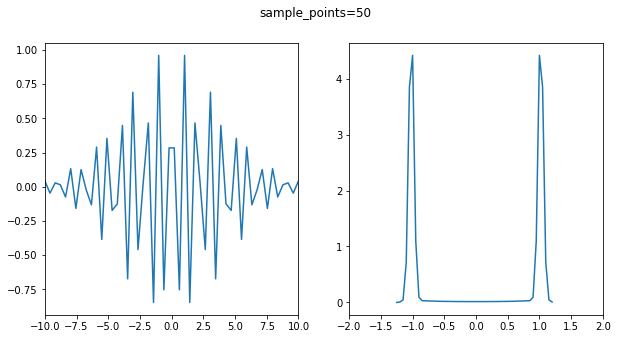

In [171]:
task_2 = DoDFT(function=func1_0,sample_points=50)   
task_2.plot_all("sample_points=50")

Sampling points = 50, the signal is under sampling, some of the frequency component are missing, but the frequency doesn't shift.

Do sampling points = 30, sampling frequency = 1.5, 0.75X Nyquist frequency

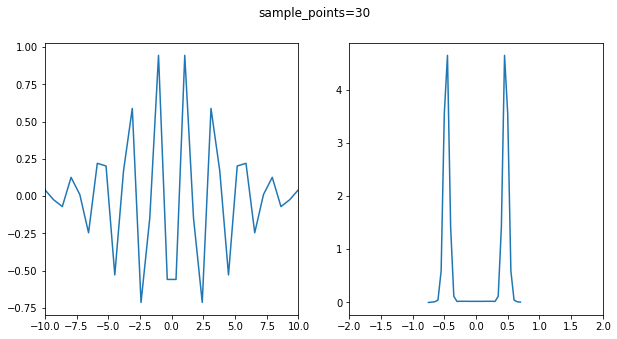

In [172]:
task_3 = DoDFT(function=func1_0,sample_points=30)
task_3.plot_all("sample_points=30")

Sampling points = 30, the signal is under sampling, more frequency component are missing, the frequency is shifting to 0.5 instead of 1.

Plot them together

(-10.0, 10.0)

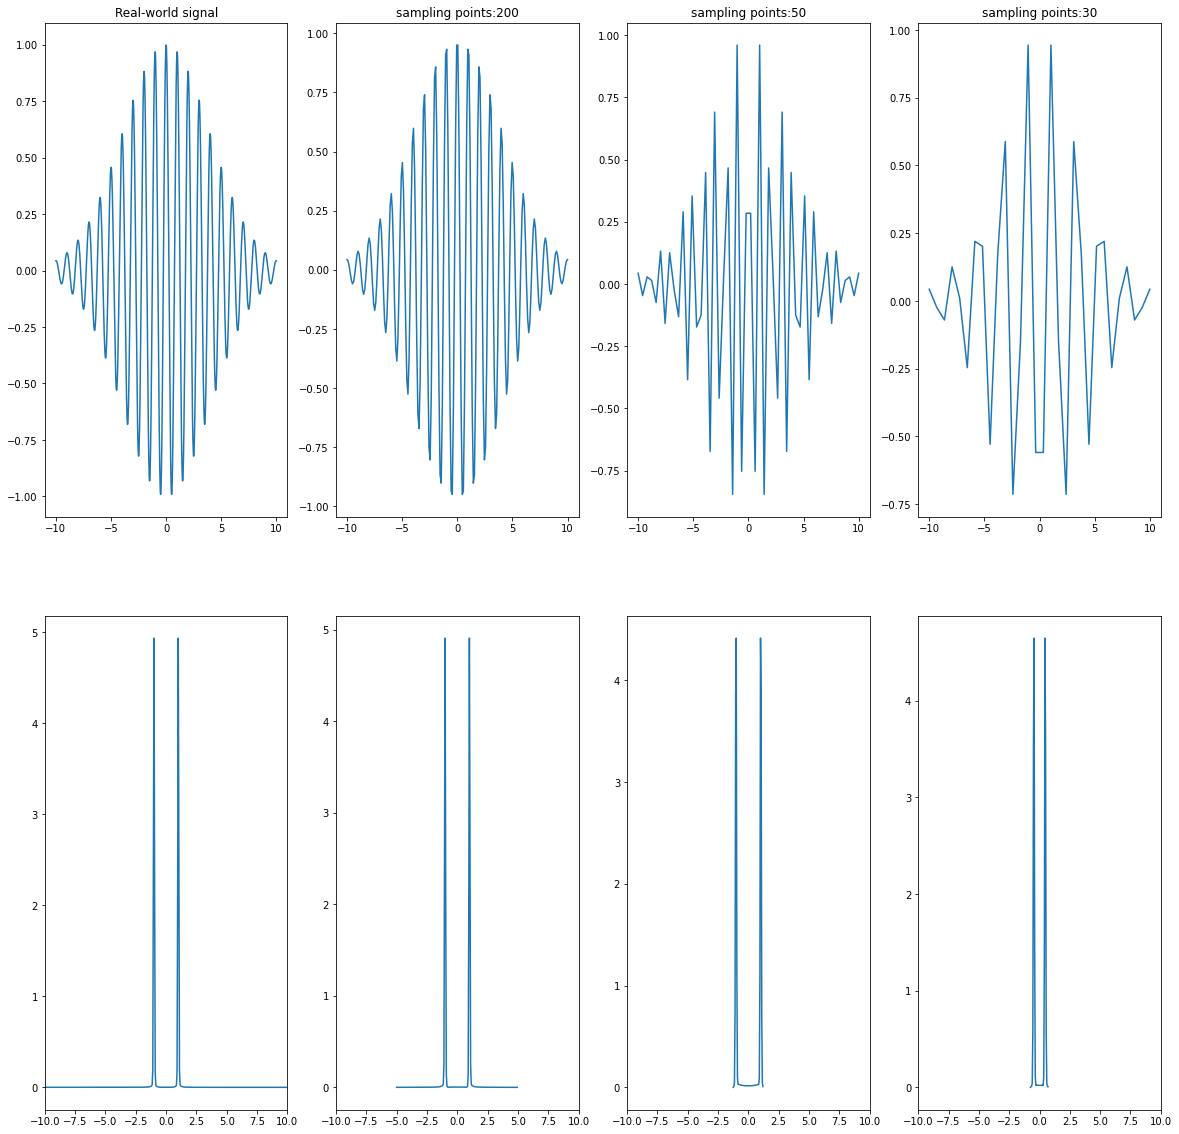

In [173]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(2, 4)
axs[0, 0].plot(real_world_signal.x, real_world_signal.signal)
axs[1, 0].plot(real_world_signal.u, real_world_signal.signal_DFT)
axs[0, 1].plot(task_1.x, task_1.signal)
axs[1, 1].plot(task_1.u, task_1.signal_DFT)
axs[0, 2].plot(task_2.x, task_2.signal)
axs[1, 2].plot(task_2.u, task_2.signal_DFT)
axs[0, 3].plot(task_3.x, task_3.signal)
axs[1, 3].plot(task_3.u, task_3.signal_DFT)

axs[0, 0].set_title("Real-world signal")
axs[0, 1].set_title("sampling points:200")
axs[0, 2].set_title('sampling points:50')
axs[0, 3].set_title('sampling points:30')

axs[1, 0].set_xlim([-10,10])
axs[1, 1].set_xlim([-10,10])
axs[1, 2].set_xlim([-10,10])
axs[1, 3].set_xlim([-10,10])

Linear, cubic and shannon interpolation.
Sampling points = 50, sampling frequency = 2.5,
which is 1.25X Nyquist frequency.

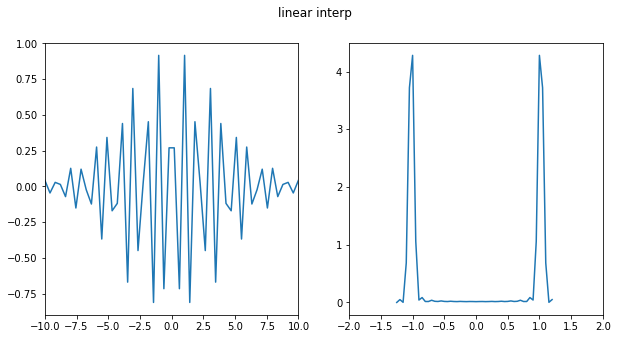

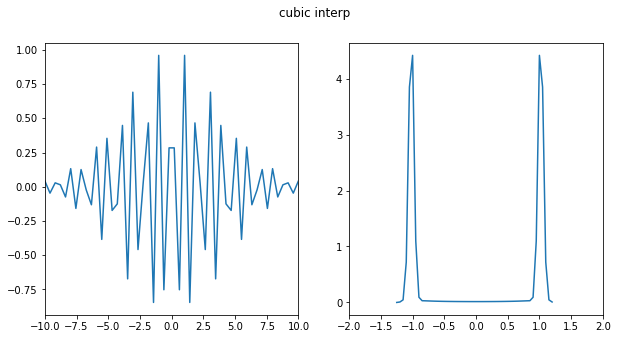

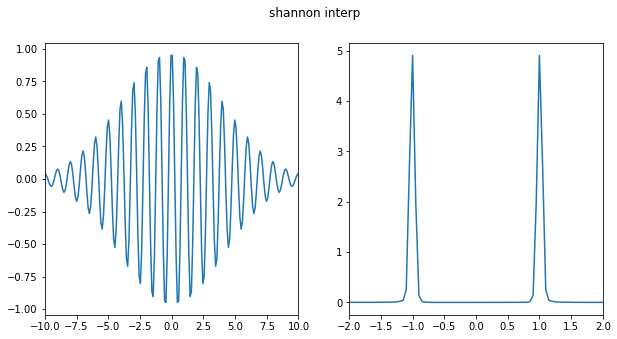

In [174]:
obserbation = DoDFT(function=func1_0,sample_points=200)
x0,y0,u0,f0 = obserbation.interp("linear", sample_points=50)
x1,y1,u1,f1 = obserbation.interp("cubic", sample_points=50)
x2,y2,u2,f2 = obserbation.interp("shannon", sample_points=50)

fix the sampling points to 50. Linear interpolation and cubic interpolation are missing some frequency component. However, shannon interpolation method reconstruct the signal relatively better.As long as the sampling rate larger than the nyquist frequency, shannon interpolation could recover the signal.

(-10.0, 10.0)

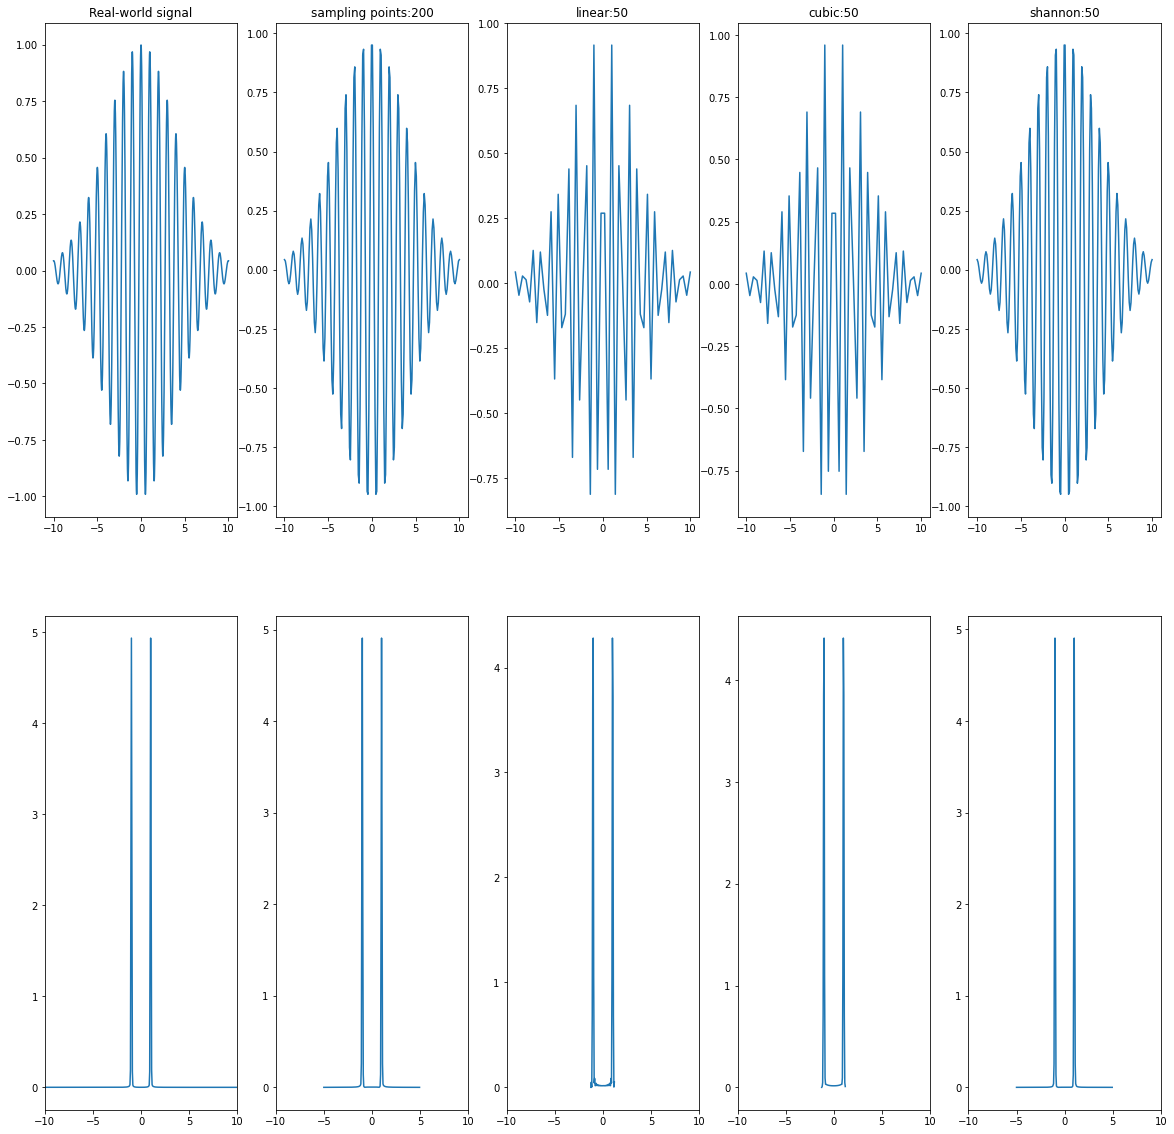

In [175]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(2, 5)
axs[0, 0].plot(real_world_signal.x, real_world_signal.signal)
axs[1, 0].plot(real_world_signal.u, real_world_signal.signal_DFT)
axs[0, 1].plot(obserbation.x, obserbation.signal)
axs[1, 1].plot(obserbation.u, obserbation.signal_DFT)
axs[0, 2].plot(x0, y0)
axs[1, 2].plot(u0, f0)
axs[0, 3].plot(x1, y1)
axs[1, 3].plot(u1, f1)
axs[0, 4].plot(x2, y2)
axs[1, 4].plot(u2, f2)

axs[0, 0].set_title("Real-world signal")
axs[0, 1].set_title("sampling points:200")
axs[0, 2].set_title('linear:50')
axs[0, 3].set_title('cubic:50')
axs[0, 4].set_title('shannon:50')

axs[1, 0].set_xlim([-10,10])
axs[1, 1].set_xlim([-10,10])
axs[1, 2].set_xlim([-10,10])
axs[1, 3].set_xlim([-10,10])
axs[1, 4].set_xlim([-10,10])

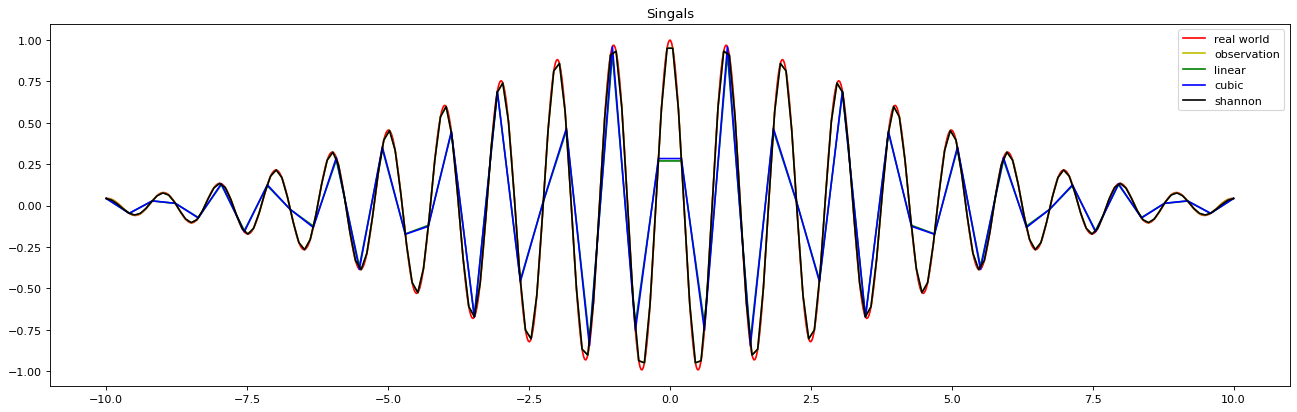

In [176]:
plt.figure(figsize=(20, 6), dpi=80)
plt.title("Singals")
plt.plot(real_world_signal.x, real_world_signal.signal, 'r')
plt.plot(obserbation.x, obserbation.signal, 'y')
plt.plot(x0,y0,'g')
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'k')
plt.legend(["real world","observation","linear","cubic","shannon"])

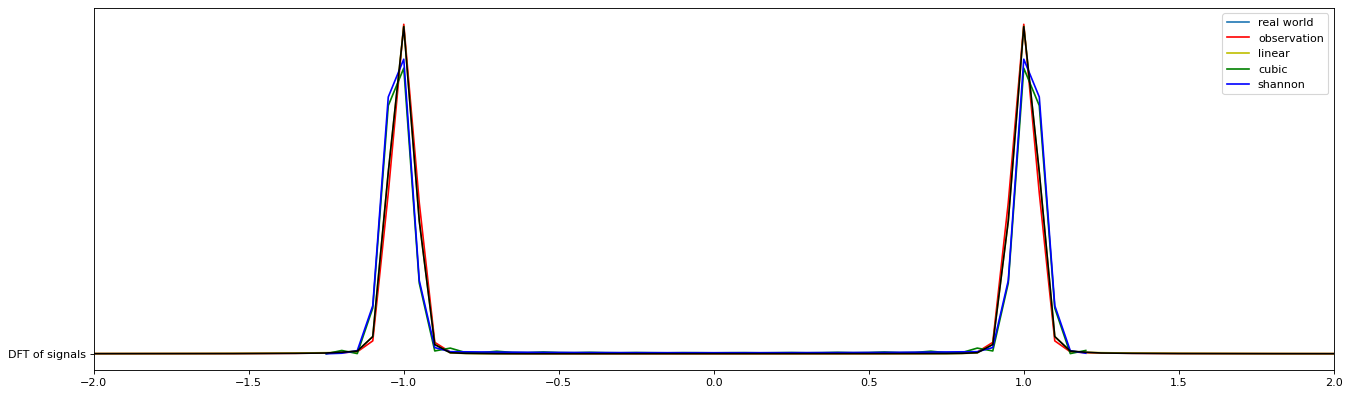

In [177]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot("DFT of signals")
plt.xlim([-2,2])
plt.plot(real_world_signal.u, real_world_signal.signal_DFT, 'r')
plt.plot(obserbation.u, obserbation.signal_DFT, 'y')
plt.plot(u0,f0,'g')
plt.plot(u1,f1,'b')
plt.plot(u2,f2,'k')
plt.legend(["real world","observation","linear","cubic","shannon"])

## Second function: Nyquist frequency = 4
\begin{align}
        \text{f(x)= } & \left. e^{-0.1πx^2}cos(4πx)  \right. \\[1em]
    \end{align}

(-5.0, 5.0)

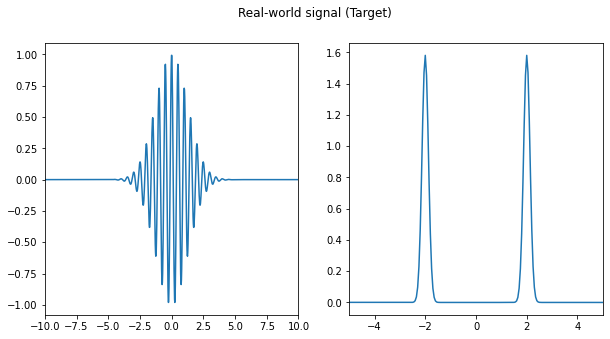

In [214]:
def func1_1(x):
  return np.exp(-0.1*np.pi*x**2)*np.cos(4*np.pi*x)

real_world_signal = DoDFT(function=func1_1,sample_points=1000)   
real_world_signal.plot_all("Real-world signal (Target)")
plt.xlim([-5,5])

Do sampling points = 200, sampling frequency = 10, 2.5X Nyquist frequency

(-5.0, 5.0)

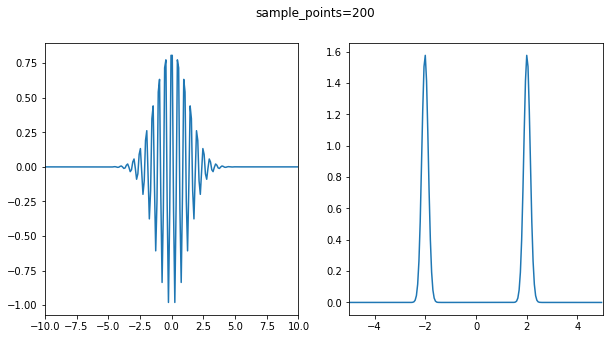

In [215]:
task_1 = DoDFT(function=func1_1,sample_points=200)   
task_1.plot_all("sample_points=200")
plt.xlim([-5,5])

Do sampling points = 100, sampling frequency = 5, 1.25X Nyquist frequency

(-5.0, 5.0)

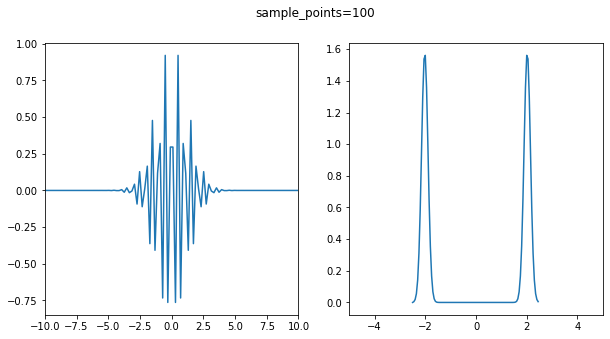

In [219]:
task_2 = DoDFT(function=func1_1,sample_points=100)   
task_2.plot_all("sample_points=100")
plt.xlim([-5,5])

Sampling points = 100, the signal is under sampling, some of the frequency component are missing, but the frequency doesn't shift.

Do sampling points = 70, sampling frequency = 3.5, 0.875X Nyquist frequency

(-5.0, 5.0)

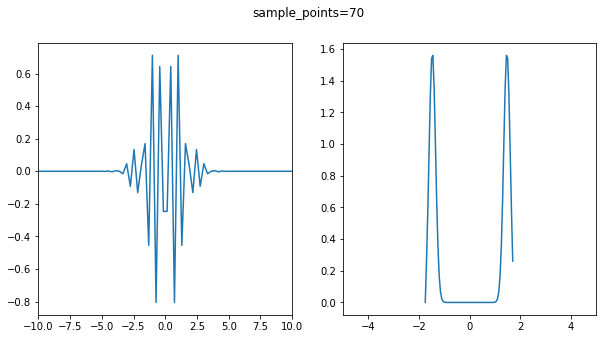

In [220]:
task_3 = DoDFT(function=func1_1,sample_points=70)   
task_3.plot_all("sample_points=70")
plt.xlim([-5,5])

Sampling points = 70, the signal is under sampling, more frequency component are missing, the frequency is shifting to 1.5 instead of 2.

Plot them together

(-5.0, 5.0)

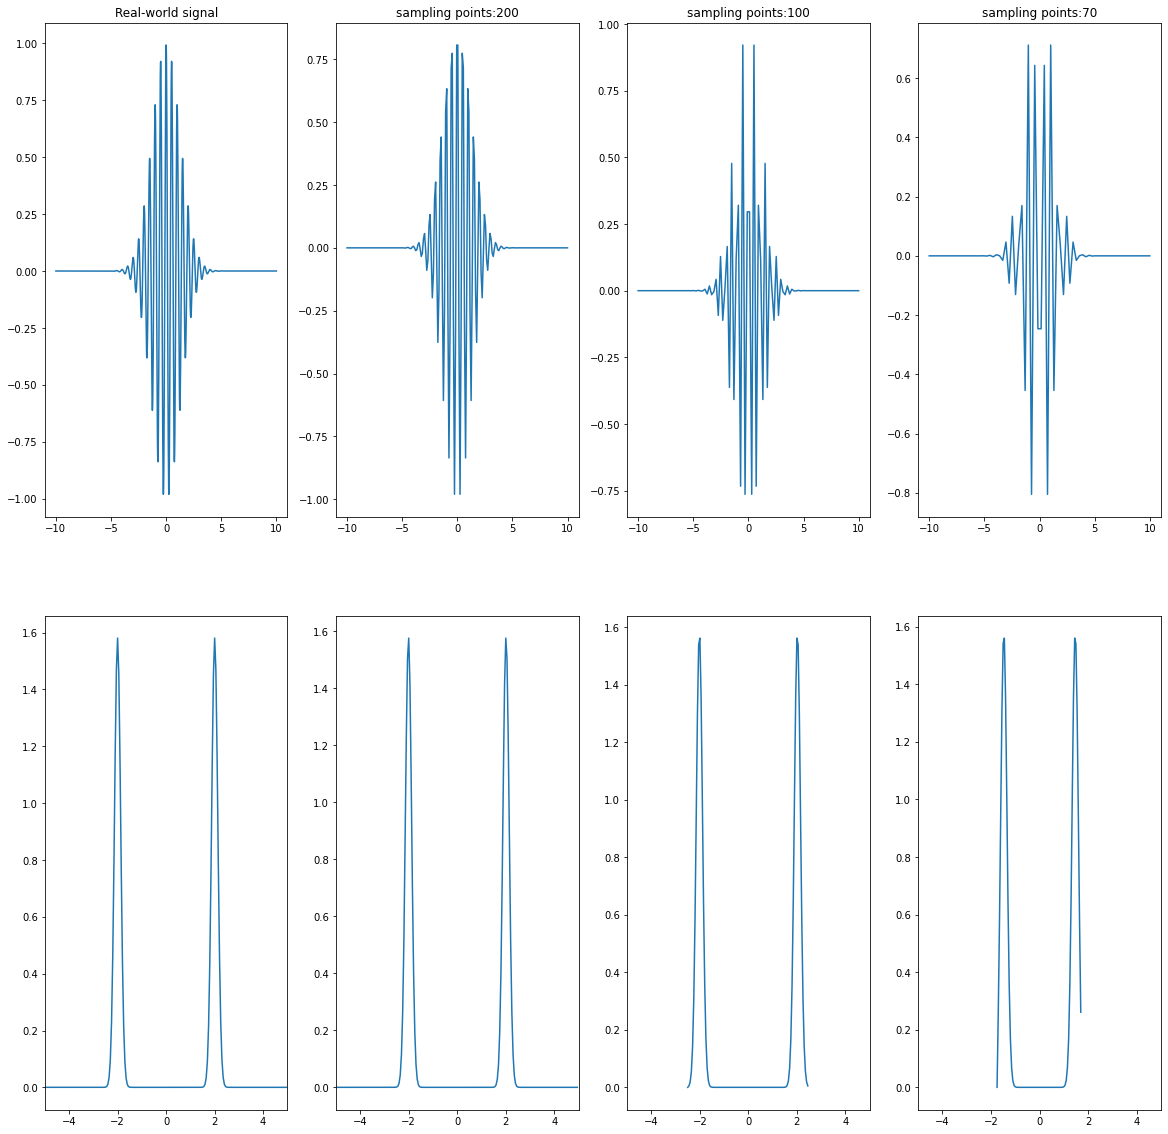

In [223]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(2, 4)
axs[0, 0].plot(real_world_signal.x, real_world_signal.signal)
axs[1, 0].plot(real_world_signal.u, real_world_signal.signal_DFT)
axs[0, 1].plot(task_1.x, task_1.signal)
axs[1, 1].plot(task_1.u, task_1.signal_DFT)
axs[0, 2].plot(task_2.x, task_2.signal)
axs[1, 2].plot(task_2.u, task_2.signal_DFT)
axs[0, 3].plot(task_3.x, task_3.signal)
axs[1, 3].plot(task_3.u, task_3.signal_DFT)

axs[0, 0].set_title("Real-world signal")
axs[0, 1].set_title("sampling points:200")
axs[0, 2].set_title('sampling points:100')
axs[0, 3].set_title('sampling points:70')

axs[1, 0].set_xlim([-5,5])
axs[1, 1].set_xlim([-5,5])
axs[1, 2].set_xlim([-5,5])
axs[1, 3].set_xlim([-5,5])

(-5.0, 5.0)

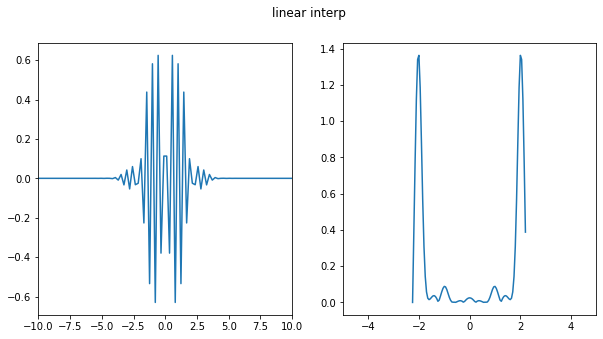

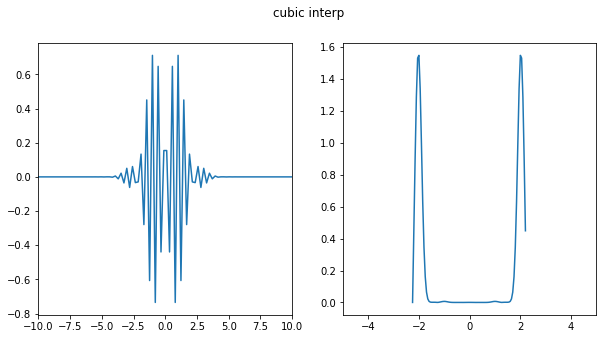

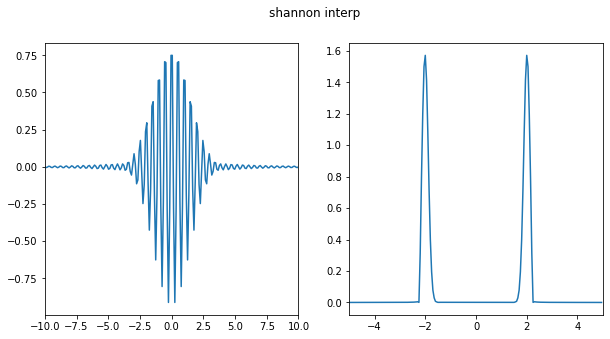

In [227]:
obserbation = DoDFT(function=func1_1,sample_points=200)
x0,y0,u0,f0 = obserbation.interp("linear", sample_points=90)
plt.xlim([-5,5])
x1,y1,u1,f1 = obserbation.interp("cubic", sample_points=90)
plt.xlim([-5,5])
x2,y2,u2,f2 = obserbation.interp("shannon", sample_points=90)
plt.xlim([-5,5])

fix the sampling points to 90 (1.125X Nuquist). Linear interpolation and cubic interpolation are missing some frequency component. However, shannon interpolation method reconstruct the signal relatively better.As long as the sampling rate larger than the nyquist frequency, shannon interpolation could recover the signal.

(-5.0, 5.0)

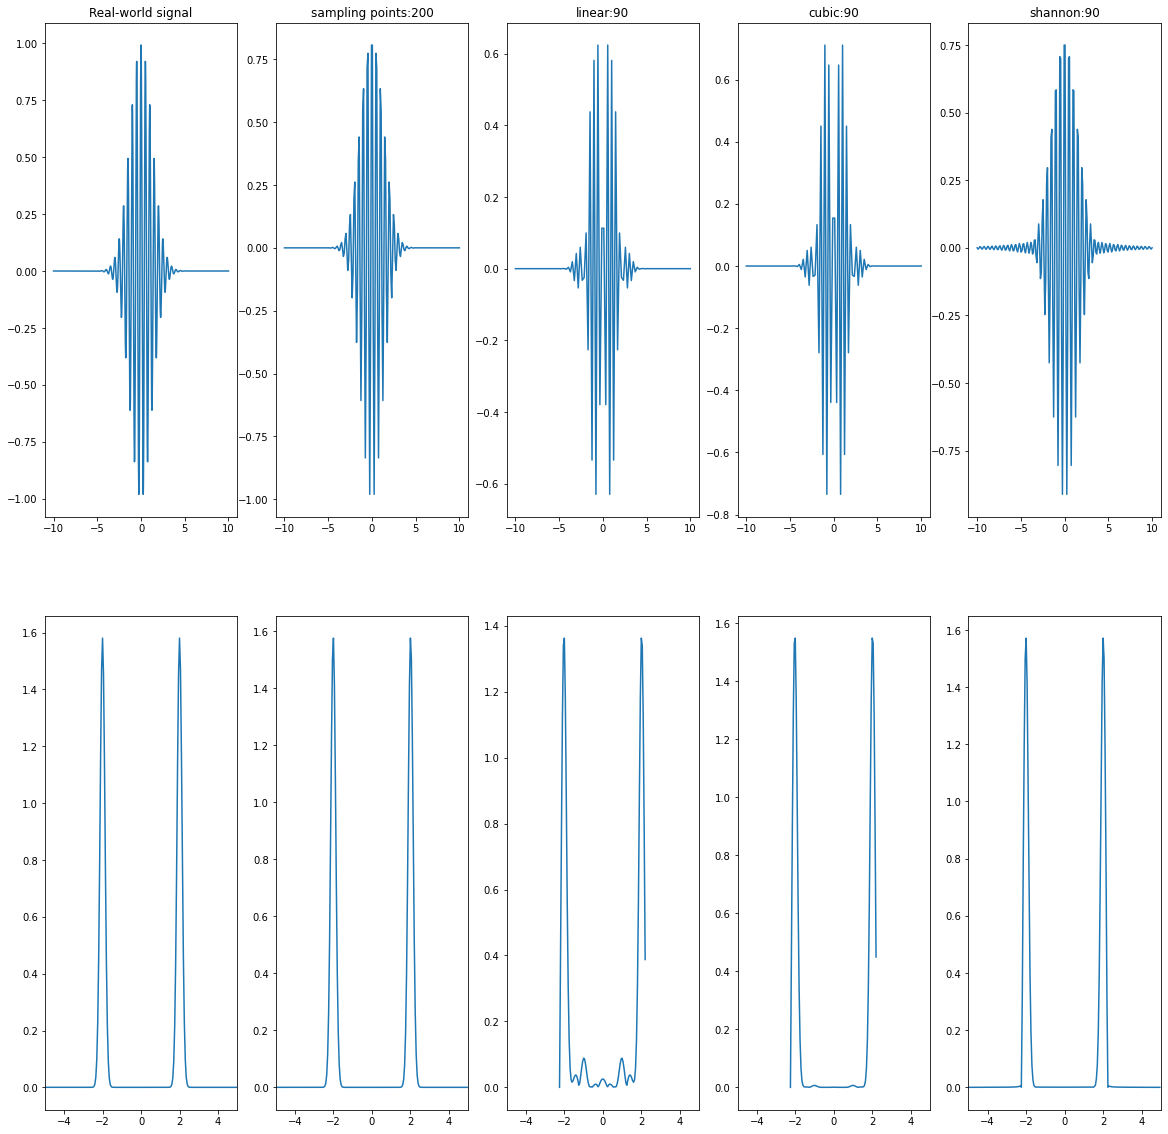

In [228]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(2, 5)
axs[0, 0].plot(real_world_signal.x, real_world_signal.signal)
axs[1, 0].plot(real_world_signal.u, real_world_signal.signal_DFT)
axs[0, 1].plot(obserbation.x, obserbation.signal)
axs[1, 1].plot(obserbation.u, obserbation.signal_DFT)
axs[0, 2].plot(x0, y0)
axs[1, 2].plot(u0, f0)
axs[0, 3].plot(x1, y1)
axs[1, 3].plot(u1, f1)
axs[0, 4].plot(x2, y2)
axs[1, 4].plot(u2, f2)

axs[0, 0].set_title("Real-world signal")
axs[0, 1].set_title("sampling points:200")
axs[0, 2].set_title('linear:90')
axs[0, 3].set_title('cubic:90')
axs[0, 4].set_title('shannon:90')

axs[1, 0].set_xlim([-5,5])
axs[1, 1].set_xlim([-5,5])
axs[1, 2].set_xlim([-5,5])
axs[1, 3].set_xlim([-5,5])
axs[1, 4].set_xlim([-5,5])

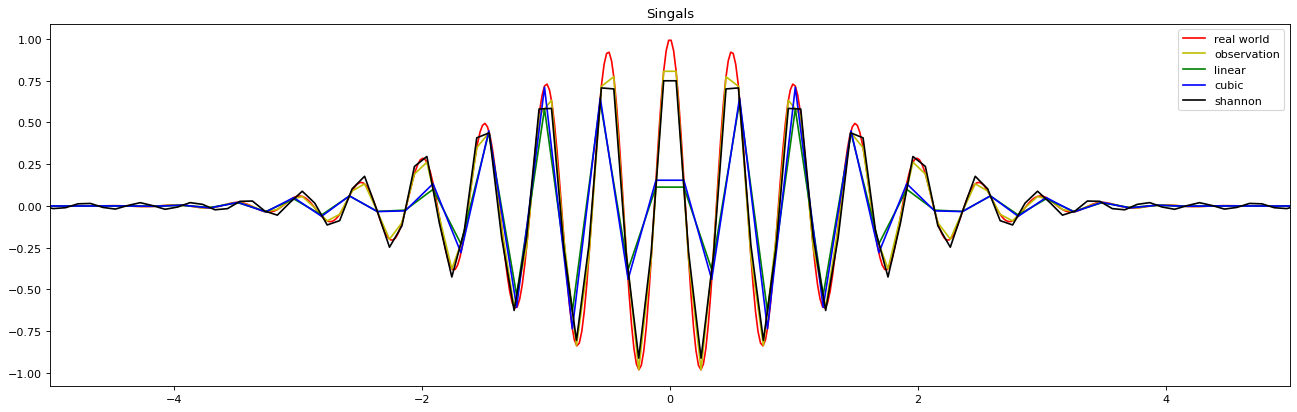

In [235]:
plt.figure(figsize=(20, 6), dpi=80)
plt.xlim([-5,5])
plt.title("Singals")
plt.plot(real_world_signal.x, real_world_signal.signal, 'r')
plt.plot(obserbation.x, obserbation.signal, 'y')
plt.plot(x0,y0,'g')
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'k')
plt.legend(["real world","observation","linear","cubic","shannon"])

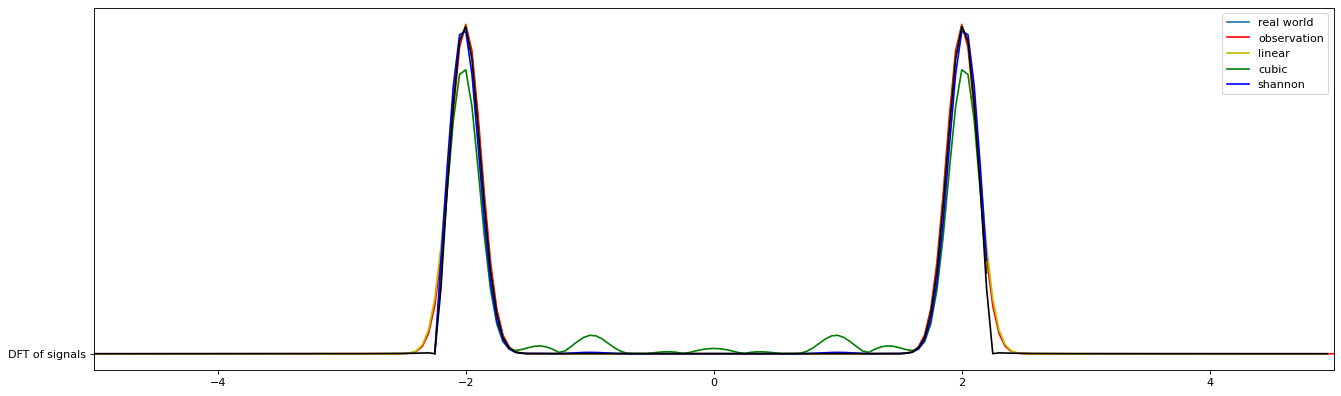

In [233]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot("DFT of signals")
plt.xlim([-5,5])
plt.plot(real_world_signal.u, real_world_signal.signal_DFT, 'r')
plt.plot(obserbation.u, obserbation.signal_DFT, 'y')
plt.plot(u0,f0,'g')
plt.plot(u1,f1,'b')
plt.plot(u2,f2,'k')
plt.legend(["real world","observation","linear","cubic","shannon"])

# Problem 3: discrete wavelet transformation of image

## Wavelet basis

Text(0.5, 1.0, '$\\psi_{0,-1}(x)$')

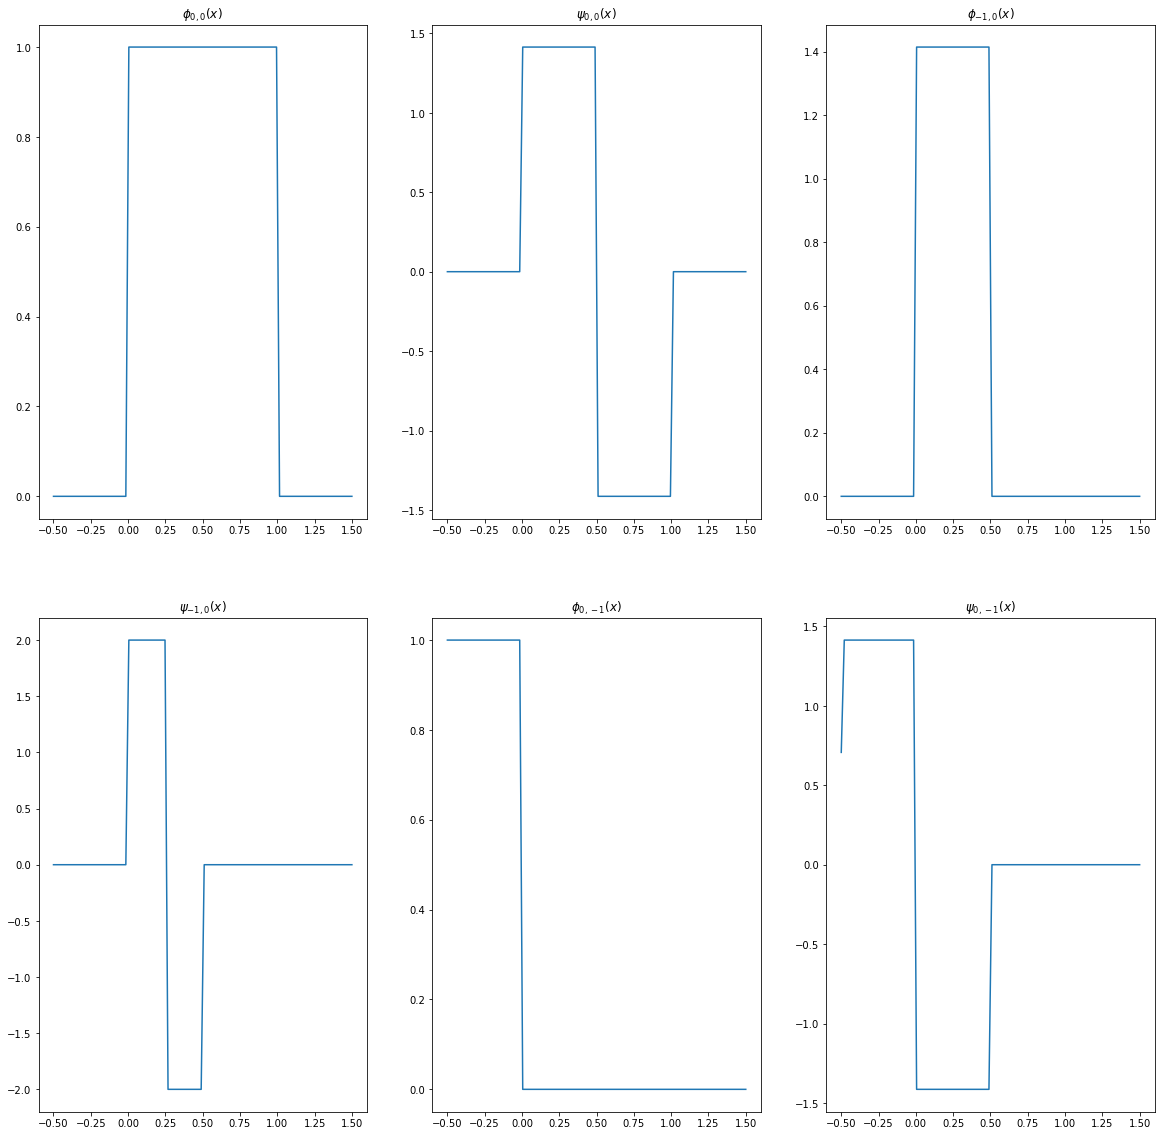

In [179]:
def betab(x):
  b=(1.0-np.sign(np.abs(x-0.5)-0.5))/2.0
  return b
beta=np.vectorize(betab)

def phi(j,n,x):
  phib=beta(x/(2.**j)-n)/np.sqrt(2**j)
  return phib

def psi(j,n,x):
  psib=phi(j-1,n,x)-phi(j-1,n+1,x)
  return psib

xp=np.linspace(-0.5,1.5,100)
plt.subplot(2,3,1)
plt.plot(xp,phi(0,0,xp))
plt.title("$\phi_{0,0}(x)$")
plt.subplot(2,3,2)
plt.plot(xp,psi(0,0,xp))
plt.title("$\psi_{0,0}(x)$")
plt.subplot(2,3,3)
plt.plot(xp,phi(-1,0,xp))
plt.title("$\phi_{-1,0}(x)$")
plt.subplot(2,3,4)
plt.plot(xp,psi(-1,0,xp))
plt.title("$\psi_{-1,0}(x)$")
plt.subplot(2,3,5)
plt.plot(xp,phi(0,-1,xp))
plt.title("$\phi_{0,-1}(x)$")
plt.subplot(2,3,6)
plt.plot(xp,psi(0,-1,xp))
plt.title("$\psi_{0,-1}(x)$")

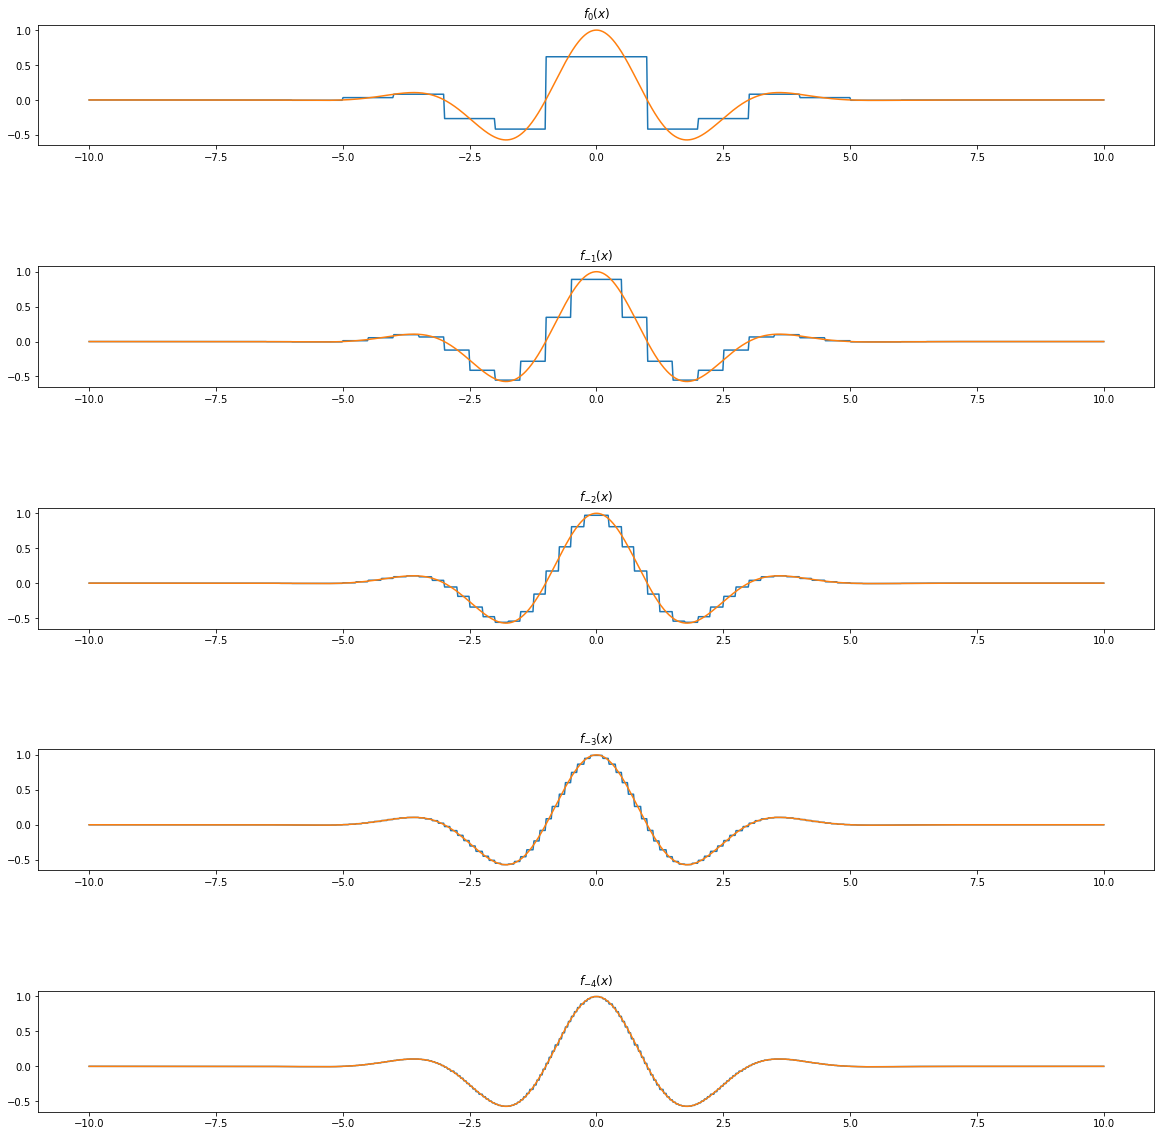

In [180]:
xsize=10;
xrange=np.linspace(-xsize,xsize,1000)

def fx(x):
  return np.exp(-0.05*np.pi*x**2)*np.cos(2*np.pi*x/4.)

gx=np.vectorize(fx)

def fxHaar(levels):
  for level in levels:
    haarCoeff=np.zeros(np.int(2.*xsize*(2**level)))
    for pop in np.arange(len(haarCoeff)):
      haarCoeff[pop]=(2.**level)*integrate.quad(gx,np.float((pop)*(1./(2.**level))-xsize),np.float((pop+1)*(1./(2.**level))-xsize))[0]
    def fp(x):
      fpp=haarCoeff[np.mod(np.int(np.floor((x+xsize)*(2**level))),len(haarCoeff))]
      return fpp
    gp=np.vectorize(fp)
    plt.subplot(len(levels),1,level+1)
    plt.subplots_adjust(hspace=1)
    plt.plot(xrange,gp(xrange),xrange,gx(xrange))
    plt.title('$f_{%d}(x)$' % -level)

levels = np.array([0,1,2,3,4])
fxHaar(levels)

## Wavelet transformation for my image

In [251]:
!wget https://raw.githubusercontent.com/djbrady/computationalImaging/master/images/dubaiBridge.jpg


--2021-09-07 19:37:21--  https://raw.githubusercontent.com/djbrady/computationalImaging/master/images/dubaiBridge.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2542532 (2.4M) [image/jpeg]
Saving to: ‘dubaiBridge.jpg’

dubaiBridge.jpg     100%[===================>]   2.42M  --.-KB/s    in 0.08s   

2021-09-07 19:37:21 (28.7 MB/s) - ‘dubaiBridge.jpg’ saved [2542532/2542532]



(1868, 4000, 3)


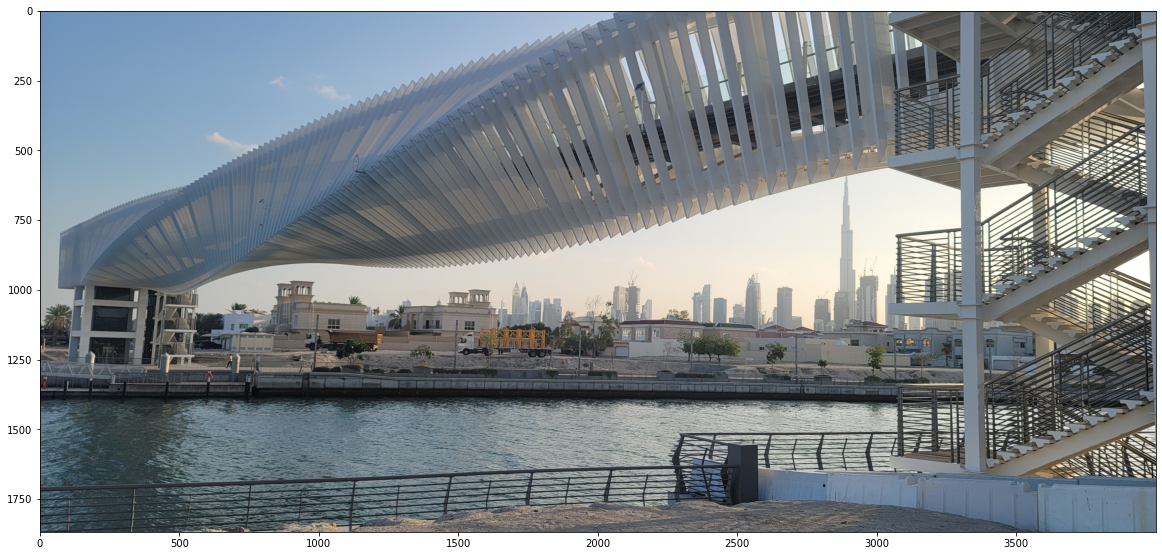

In [253]:
img=io.imread('dubaiBridge.jpg')
print(np.shape(img))
plt.imshow(img)

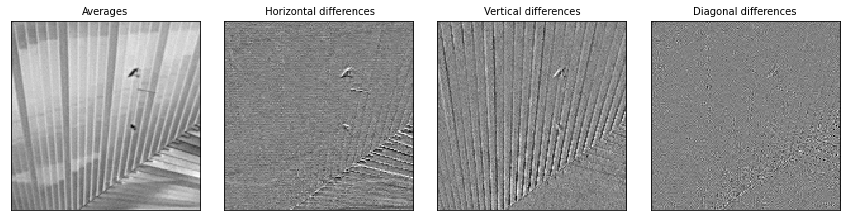

In [183]:
def do_dwt2(img):
  titles = ['Averages', ' Horizontal differences','Vertical differences', 'Diagonal differences']
  LL, (LH, HL, HH) = pywt.dwt2(img, 'haar')

  fig = plt.figure(figsize=(12, 3))
  for i, a in enumerate([LL, LH, HL, HH]):
      ax = fig.add_subplot(1, 4, i + 1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=10)
      ax.set_xticks([])
      ax.set_yticks([])
  fig.tight_layout()
  fig.show()
  return LL, LH, HL, HH

LL, LH, HL, HH = do_dwt2(img[600:900,600:900,0]) # Red


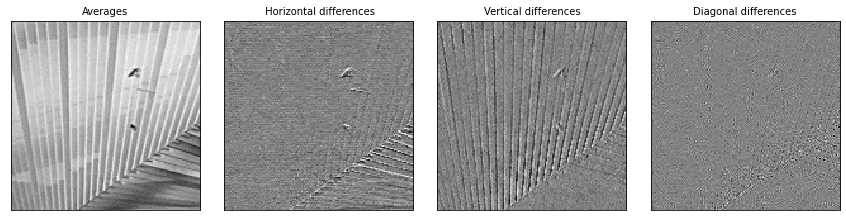

In [184]:
LL, LH, HL, HH = do_dwt2(img[600:900,600:900,1]) # Green

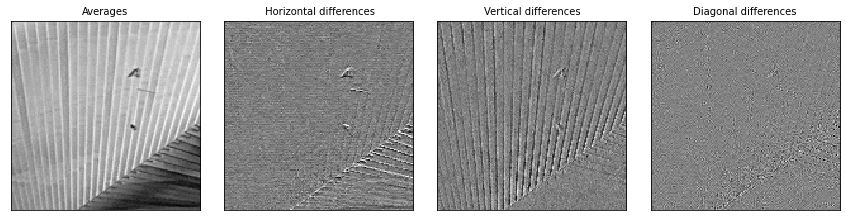

In [185]:
LL, LH, HL, HH = do_dwt2(img[600:900,600:900,2]) # Blue

The first image is the approximate image, the second one is horizontal detail, the third one is verticle detail, the forth one is diagonal detail. This technique could be applied on image compression. This portion of the image is mainly composed of verticle component, so the third image (Verticle difference) has larger response.

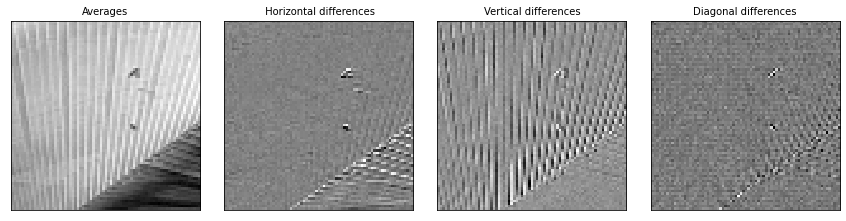

In [186]:
LL_LL, LL_LH, LL_HL, LL_HH = do_dwt2(LL)

we can also do aonther discrete wavelet transform to further compress the image.

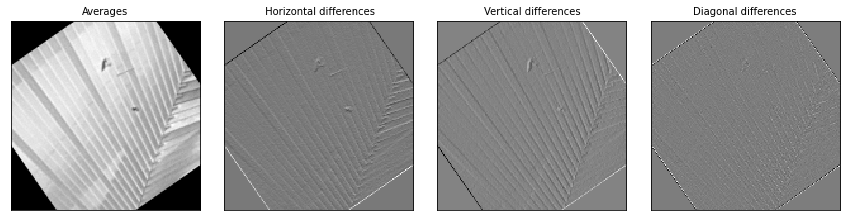

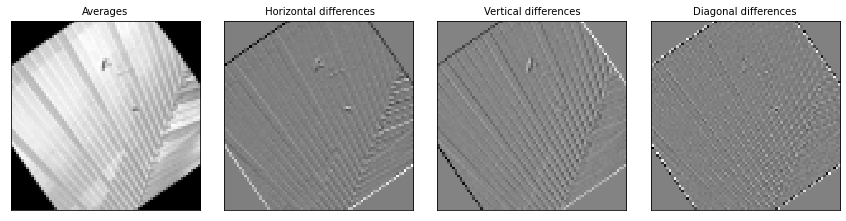

In [187]:
shift = 0
rotated_img = transform.rotate(img[600-shift:900+shift,600-shift:900+shift,0], 35)
LL, LH, HL, HH = do_dwt2(rotated_img)
LL_LL, LL_LH, LL_HL, LL_HH = do_dwt2(LL)

Rotate the image to 35 degree, we could find that the image is no longer dominated by verticle detail. Instead, Both horizontal and verticle, as well as diagonal details present due to the fact that the slanted line could be decomposed of verticle and horizontal line. 

# Problem 4:  Sampling


\begin{align}
        \text{f(x)= } & \left. e^{-0.1x^2}cos(2πx)  \right. \\[1em]
    \end{align}

In [254]:
def f(x):
  return np.cos(2*np.pi*x)*np.exp(-x**2/10)

def manipulate(f,n,Nyquist_freq,X):

  sampling_freq = Nyquist_freq * n 
  sampling_interval = 1 / sampling_freq

  sampling_points = np.int( abs(X[0]-X[1]) / sampling_interval)
  B = 1 / (2 * sampling_interval)

  x_range = np.linspace(X[0],X[1],sampling_points)
  u_range = np.linspace(-B,B,sampling_points)

  fUp = InterpolatedUnivariateSpline(x_range,f(x_range), k=5)

  plt.subplot(1,3,1)
  plt.plot(x_range,f(x_range))
  plt.title('sampled $f_n$')
  plt.subplot(1,3,2)
  xUpSample=np.linspace(X[0],X[1],8*sampling_points)
  plt.plot(xUpSample,fUp(xUpSample))
  plt.title('interpolated f(x)')
  plt.subplot(1,3,3)
  plt.plot(u_range,np.abs(np.fft.fftshift(np.fft.fft(f(x_range)))))
  plt.title('$|{\hat f}(u)|$')

The Nyquist frequency is 2. Sample with 5X Nyquist frequency.  Interpolation is implemented using 5th order B-spline.

(-2.0, 2.0)

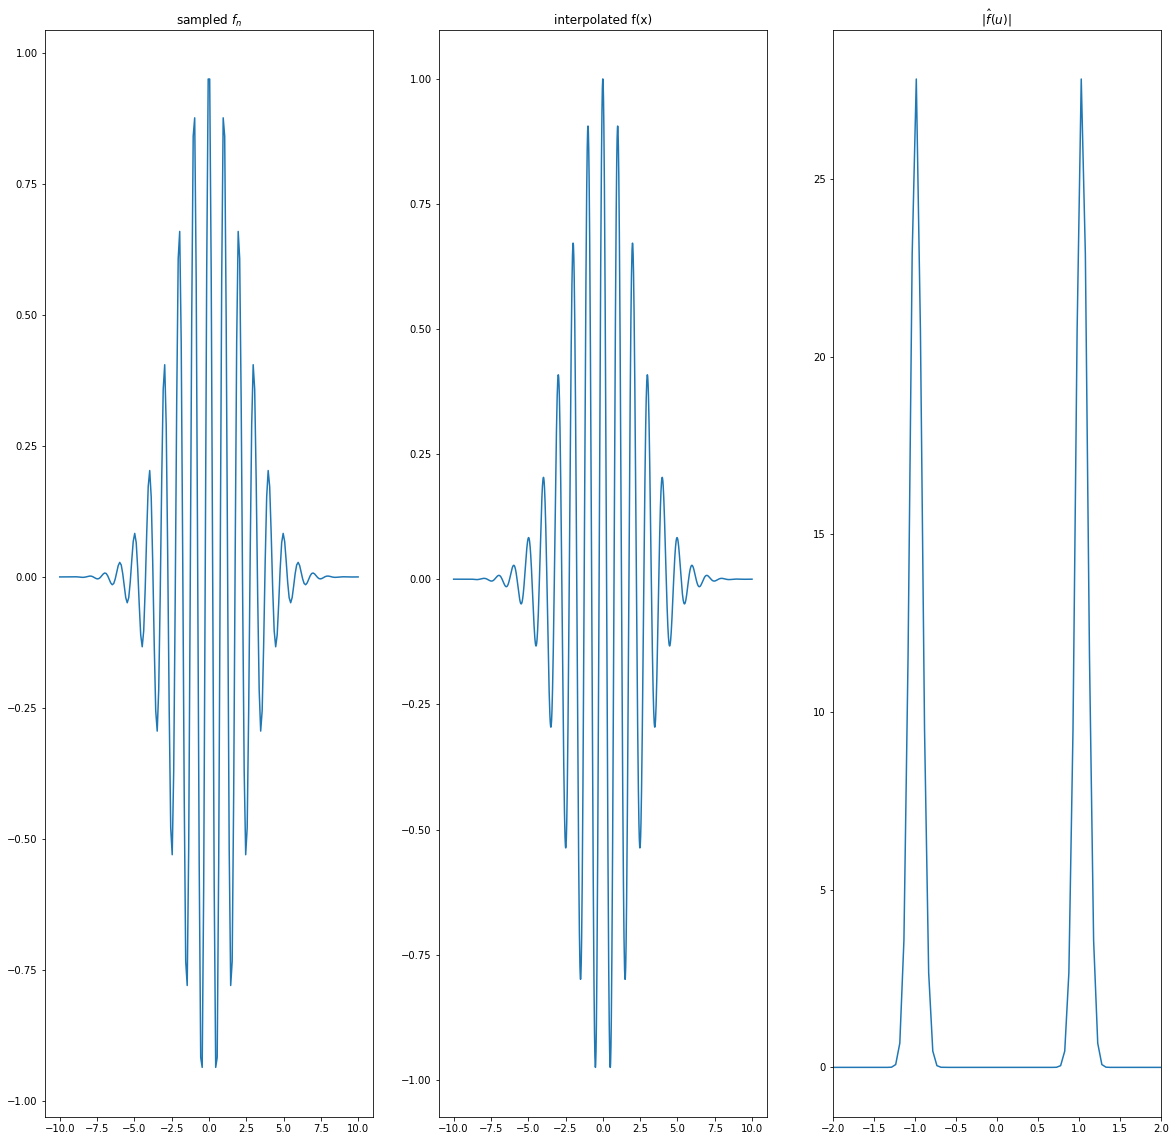

In [255]:
manipulate(f,5,2,[-10,10])
plt.xlim([-2,2])

Sample with 0.95X nyquist frequency. Aliasing effects start to appear in the interpolated signal.Some frequencies are missing, and the peak frequency is shifted to ~0.8.

(-2.0, 2.0)

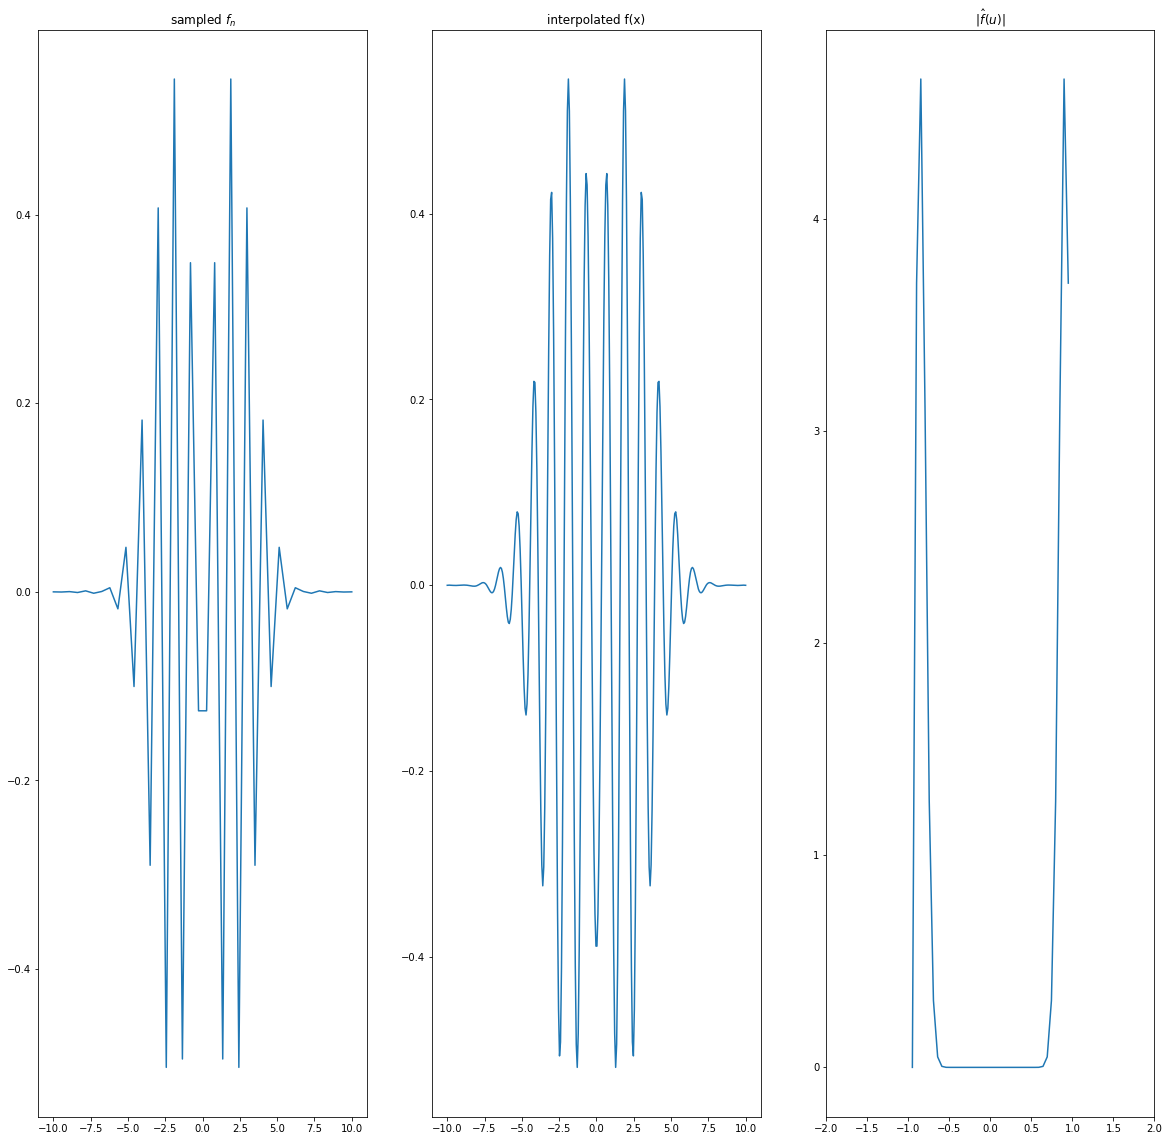

In [256]:
manipulate(f,0.95,2,[-10,10])
plt.xlim([-2,2])

Sample with 0.7X nyquist frequency. The signal is under sampled and oscillates at a lower frequency (~0.3).

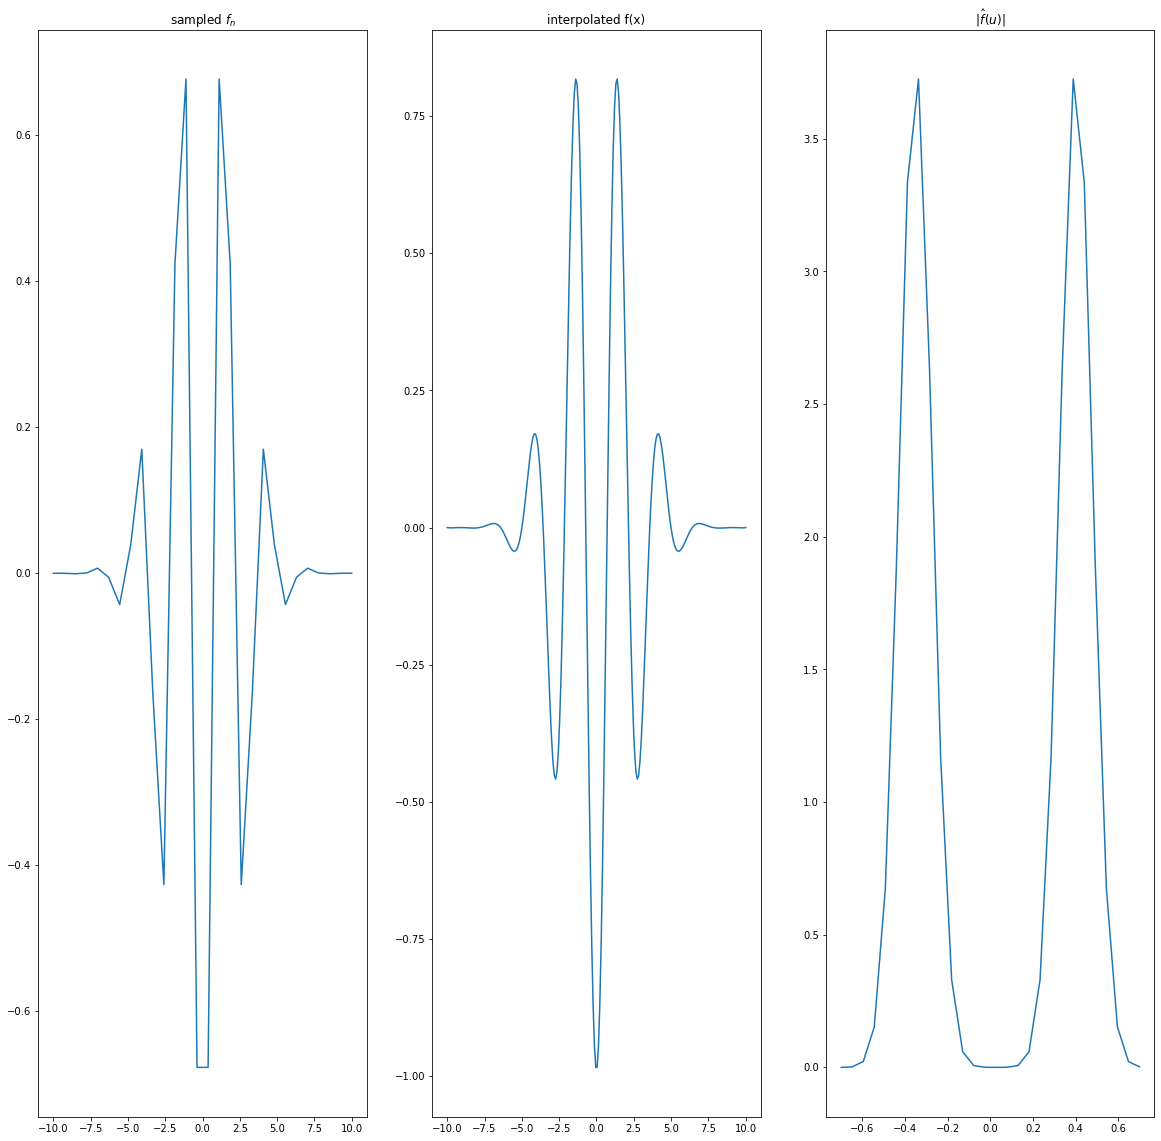

In [257]:
manipulate(f,0.7,2,[-10,10])

function f(x):
\begin{align}
        \text{f(x)= } & \left. cos(πx^2)e^{-x^2/10} \right. \\[1em]
    \end{align}
Apply different sampling period

In [192]:
X=10
def f(x):
  f=np.cos(np.pi*(x**2))*np.exp(-x**2/10)
  return f

def gn(delta=1):
  N=np.int(2*X/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f,(-X+pop*delta),(-X+(pop+1)*delta))[0]
  return gg

Text(0.5, 1.0, '$|{\\hat g}(u)|$')

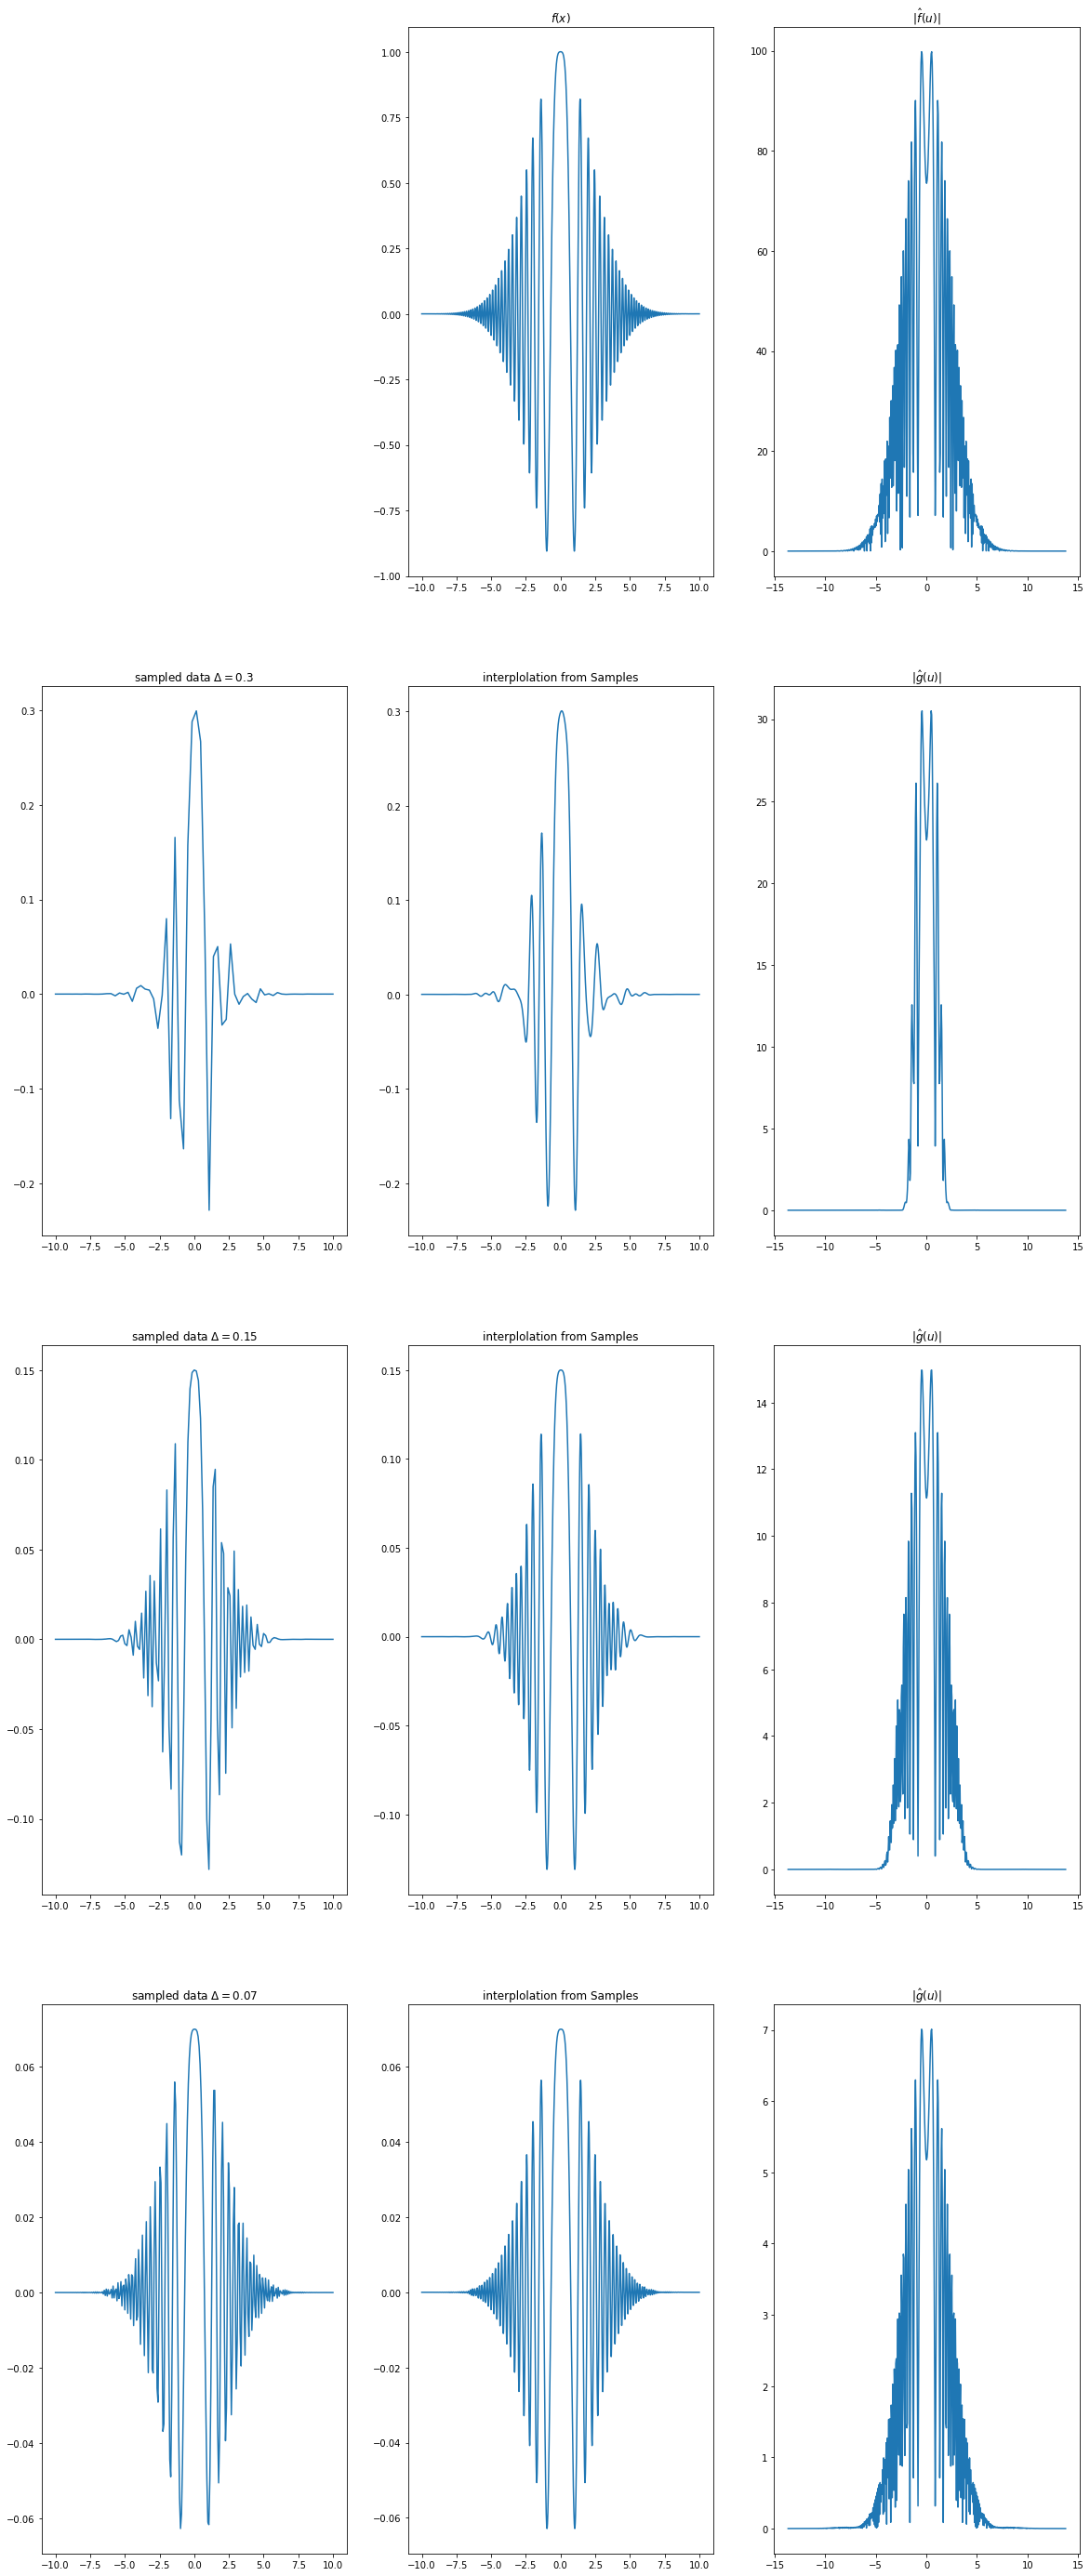

In [193]:
plt.rcParams['figure.figsize'] = [20, 50]
X=10
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)

plt.subplot(4,3,2)
plt.plot(xrange,f(xrange))
plt.title('$f(x)$')

plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')

plt.subplot(4,3,4)
gN=gn(.3)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.3$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)

plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')

plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')

plt.subplot(4,3,7)
gN=gn(.15)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.15$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)

plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')

plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')

plt.subplot(4,3,10)
gN=gn(.07)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.07$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)

plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')

plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')





Sample data, interpolated signal and Fourier magnitude for f(x) at various sampling period

# Problem 5: Spectral analysis

The mxn measurement matrix H has a singular value decomposition (SVD):
\begin{align}
        \text{H = } & \left. UΛV'\right. \\[1em]
        \end{align}

U is an mxm unitary matrix. V is an nxn unitary matrix. Λ is an mxn diagonal matrix.


The lowest order singular vectors correspond to low spatial frequencies.


## Basic functions

In [259]:
plt.rcParams['figure.figsize'] = [10, 5]
def make_matrix(psf,N):
  firstRow = np.concatenate((psf,np.zeros(N-len(psf))))
  firstColumn = np.zeros(N)
  firstColumn[0] = firstRow[0]
  H = toeplitz(firstColumn,firstRow)
  return H

def svd_plot(psf,N):
  H = make_matrix(psf,N)
  u, s, vh = np.linalg.svd(H)
  plt.subplot(1,2,1)
  plt.imshow(H)
  plt.subplot(1,2,2)
  plt.plot(s)
  return u, s, vh


## psf = [1,1,1,1,1,1,1,1]

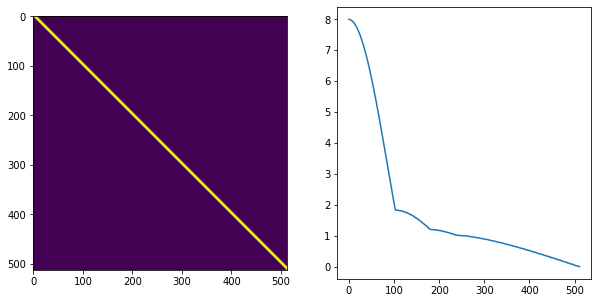

In [260]:
psf=[1,1,1,1,1,1,1,1]
N=512
u, s, vh = svd_plot(psf,N)

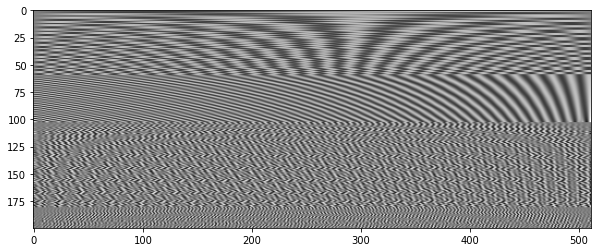

In [261]:
plt.imshow(vh[0:200,:],cmap='gray')

## psf = [1,0,1,1,0,1,0,1]

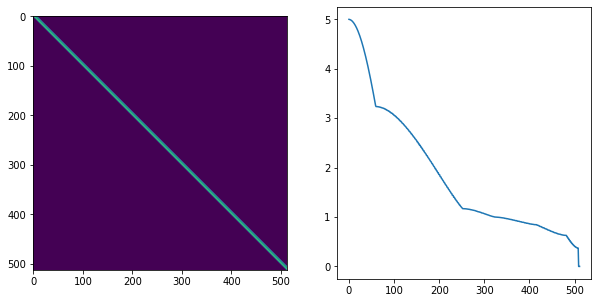

In [262]:
psf=[1,0,1,1,0,1,0,1]
N=512
u, s, vh = svd_plot(psf,N)

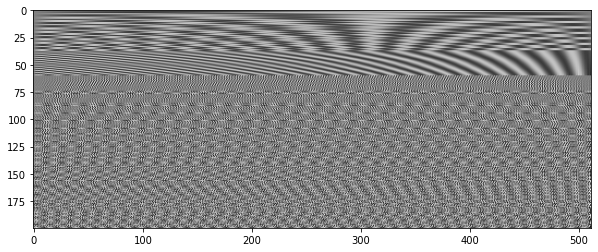

In [263]:
plt.imshow(vh[0:200,:],cmap='gray')

higher frequency response is obtained in the low order singular vectors with psf = [1,0,1,1,0,1,0,1]

## psf = [1,-1,1,1,-1,1,-1,1]

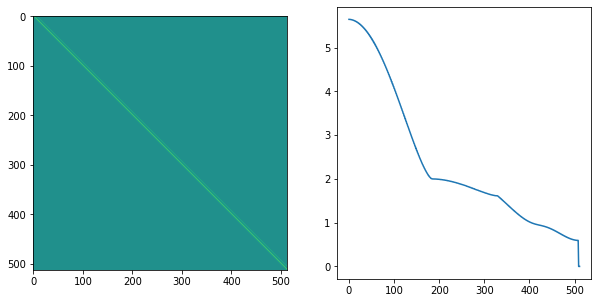

In [264]:
psf = [1,-1,1,1,-1,1,-1,1]
N=512
u, s, vh = svd_plot(psf,N)

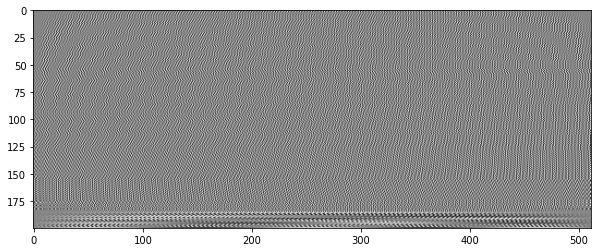

In [265]:
plt.imshow(vh[0:200,:],cmap='gray')

Even mroe higher frequency response is obtained in the low order singular vectors with psf = [1,-1,1,1,-1,1,-1,1]

## Random psf

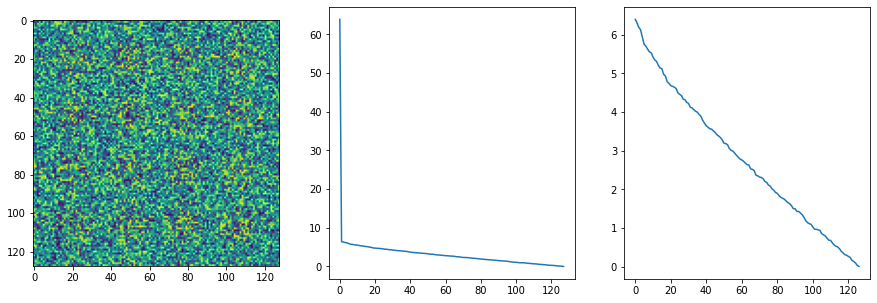

In [266]:
plt.rcParams['figure.figsize'] = [15, 5]
H=np.random.random((128,128))
u, s, vh=np.linalg.svd(H)
plt.subplot(1,3,1)
plt.imshow(H)
plt.subplot(1,3,2)
plt.plot(s)
plt.subplot(1,3,3)
plt.plot(s[1:])

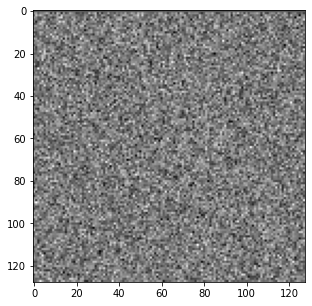

In [202]:
plt.imshow(vh,cmap='gray')

## Sinc psf

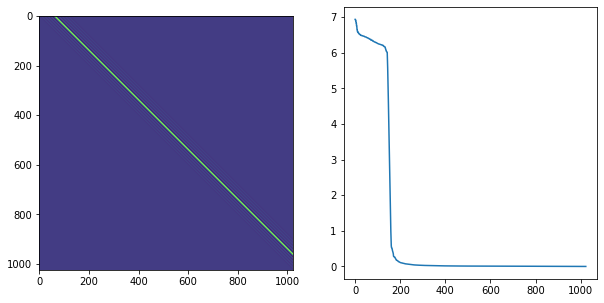

In [268]:
plt.rcParams['figure.figsize'] = [10, 5]
psf = np.sinc(np.linspace(-10,10,128))
N = 1024
u, s, vh = svd_plot(psf,N)

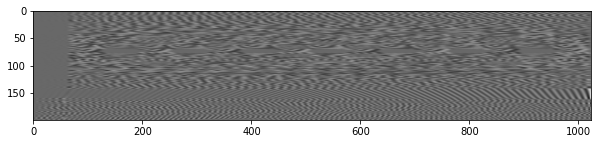

In [269]:
plt.imshow(vh[0:200,:],cmap='gray')

## Sinc square psf

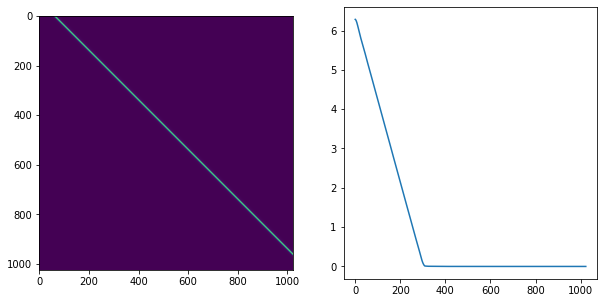

In [270]:
psf=np.abs(np.sinc(np.linspace(-10,10,128)))**2
N=1024
u, s, vh = svd_plot(psf,N)

The frequency transfer function for this PSF is the autocorrelation of the rect function, which yields a triangle function.

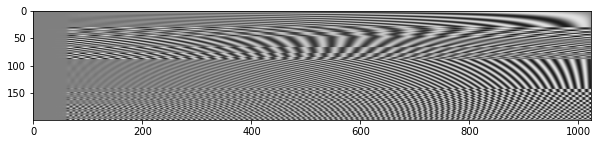

In [271]:
plt.imshow(vh[0:200,:],cmap='gray')